In [1]:
import os
import torch
import clip
from PIL import Image
from itertools import combinations


In [3]:
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    square_image = image.resize((224, 224), Image.LANCZOS)
    return square_image

def calculate_clip_similarity(folder_path):
    # Load the CLIP model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Find all images in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    images = [load_and_preprocess_image(path) for path in image_paths]

    # Preprocess images and calculate features
    image_tensors = torch.cat([preprocess(image).unsqueeze(0).to(device) for image in images])
    print(image_tensors.shape)
    with torch.no_grad():
        image_features = model.encode_image(image_tensors).float()

    # Calculate similarity for each pair
    similarities = []
    for (img1, feature1), (img2, feature2) in combinations(zip(image_paths, image_features), 2):
        similarity = torch.nn.functional.cosine_similarity(feature1, feature2, dim=0).item()
        similarities.append((img1, img2, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[2], reverse=True)

    return similarities

# Example usage
folder_name = "testset_manual_filtered"
similarities = calculate_clip_similarity(folder_name)

torch.Size([835, 3, 224, 224])


('testset_manual_filtered/15428.png', 'testset_manual_filtered/11489.png', 1.0000001192092896)


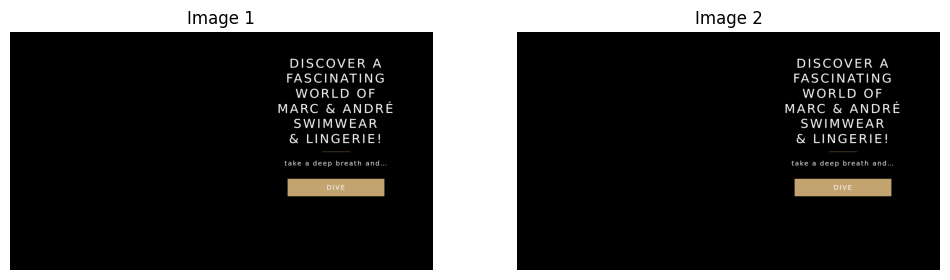

('testset_manual_filtered/525.png', 'testset_manual_filtered/6356.png', 1.0000001192092896)


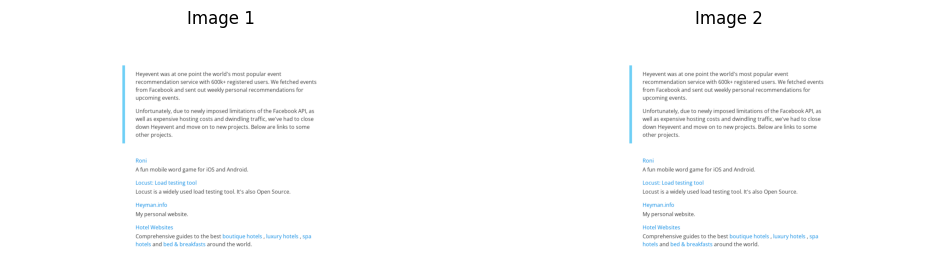

('testset_manual_filtered/12083.png', 'testset_manual_filtered/11825.png', 1.0)


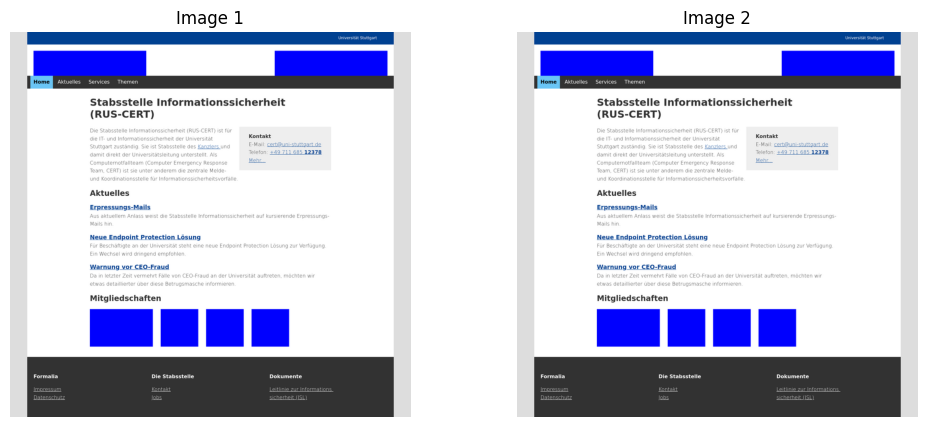

('testset_manual_filtered/12083.png', 'testset_manual_filtered/17369.png', 1.0)


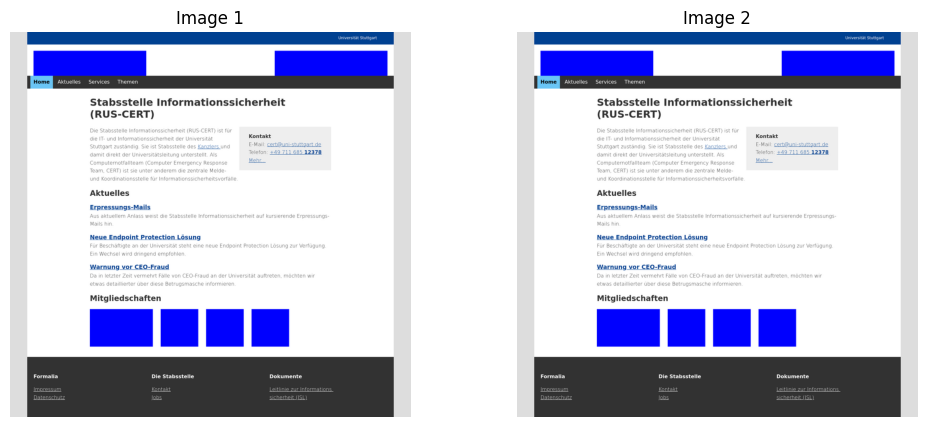

('testset_manual_filtered/12083.png', 'testset_manual_filtered/16766.png', 1.0)


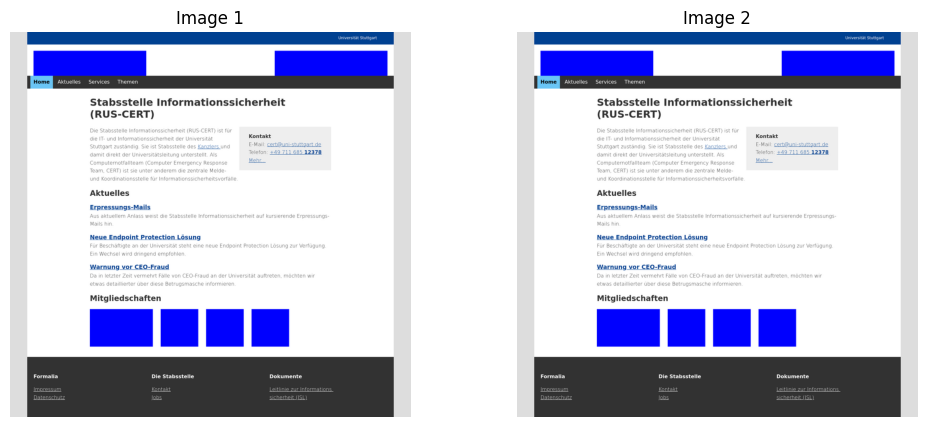

('testset_manual_filtered/11825.png', 'testset_manual_filtered/17369.png', 1.0)


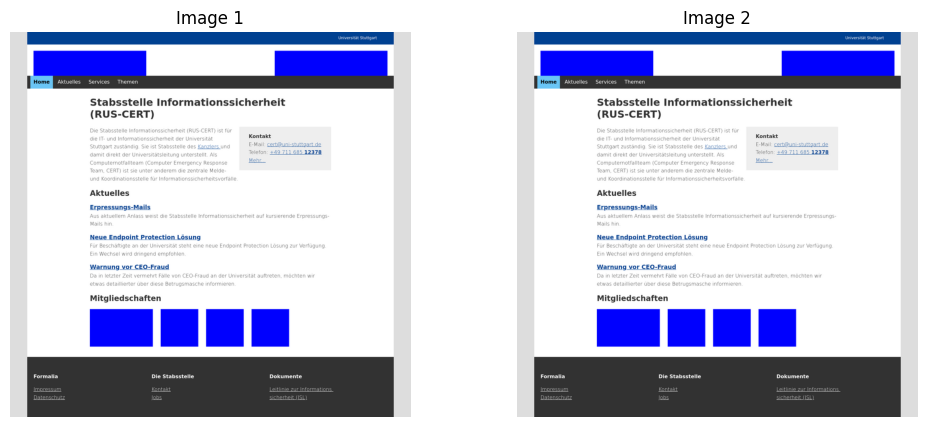

('testset_manual_filtered/11825.png', 'testset_manual_filtered/16766.png', 1.0)


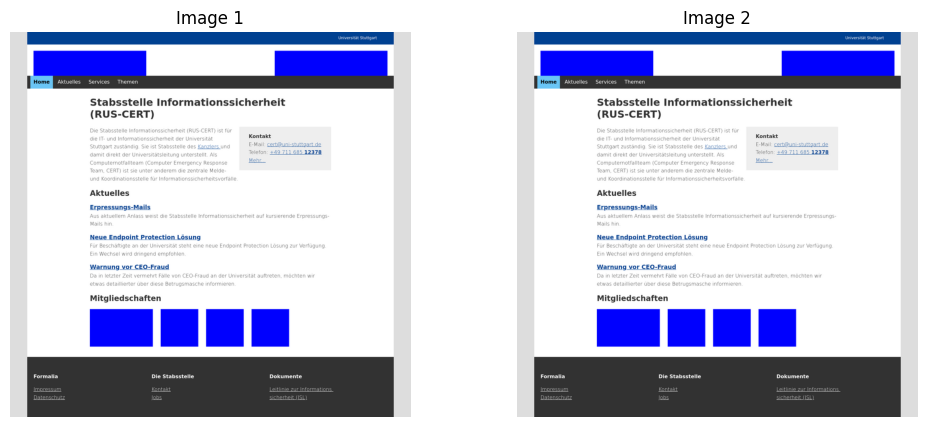

('testset_manual_filtered/17369.png', 'testset_manual_filtered/16766.png', 1.0)


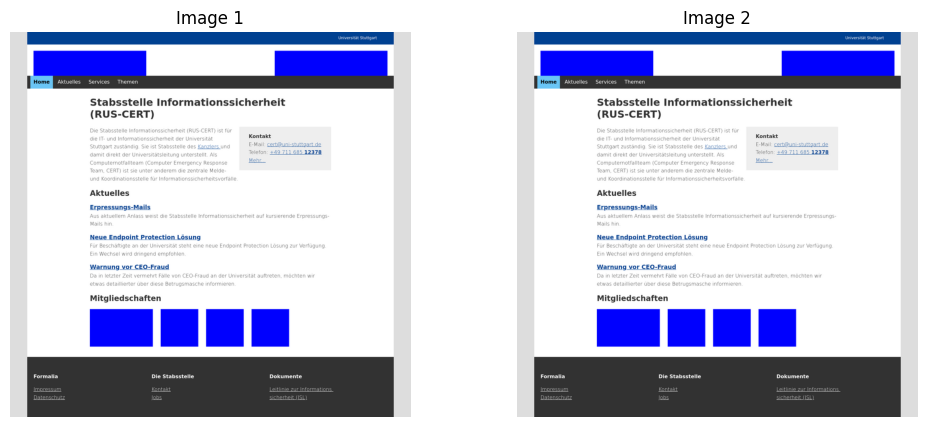

('testset_manual_filtered/1963.png', 'testset_manual_filtered/17273.png', 0.9999997615814209)


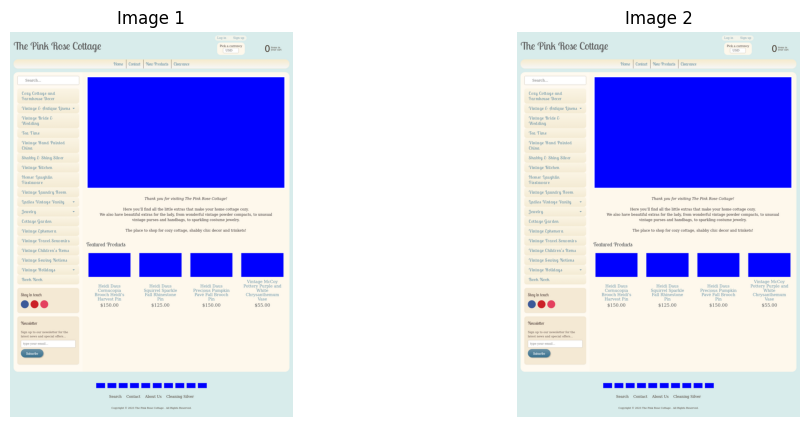

('testset_manual_filtered/12636.png', 'testset_manual_filtered/13092.png', 0.9980530142784119)


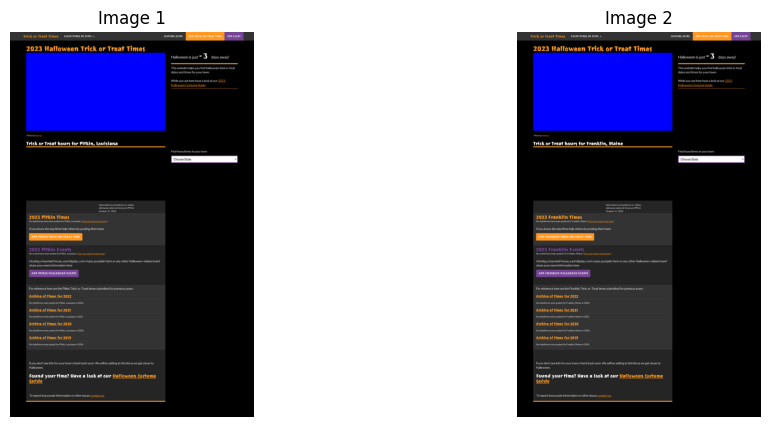

('testset_manual_filtered/13322.png', 'testset_manual_filtered/17737.png', 0.9959543943405151)


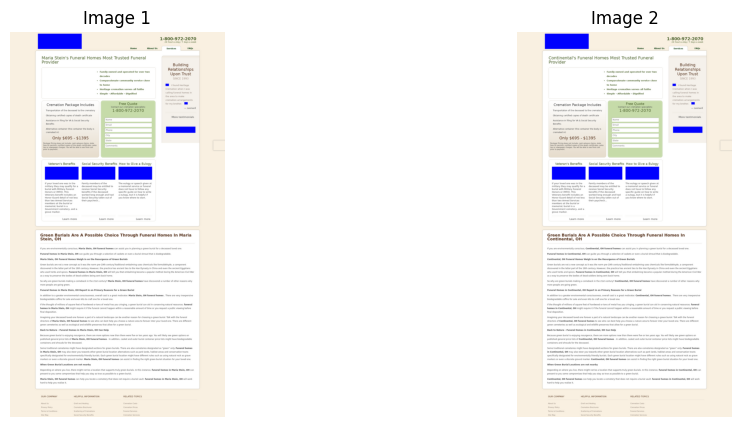

('testset_manual_filtered/2789.png', 'testset_manual_filtered/17683.png', 0.9942308664321899)


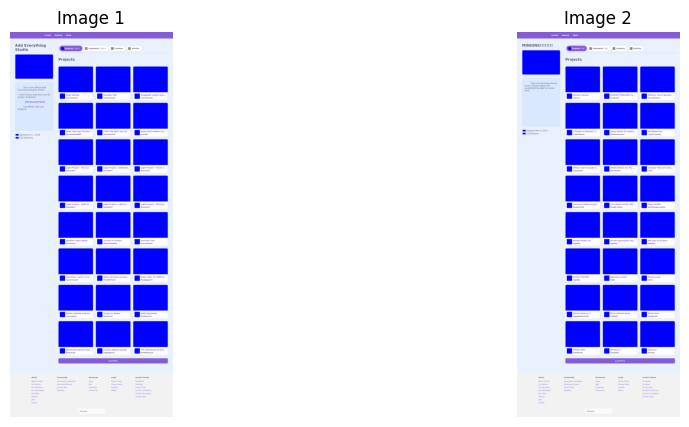

('testset_manual_filtered/9898.png', 'testset_manual_filtered/10021.png', 0.9926233291625977)


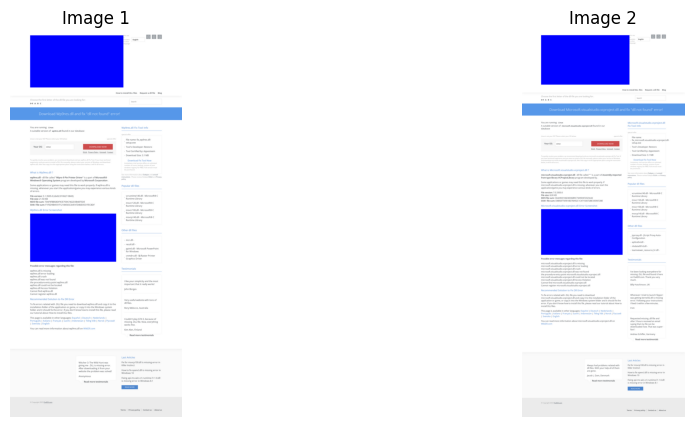

('testset_manual_filtered/9335.png', 'testset_manual_filtered/12978.png', 0.9904962778091431)


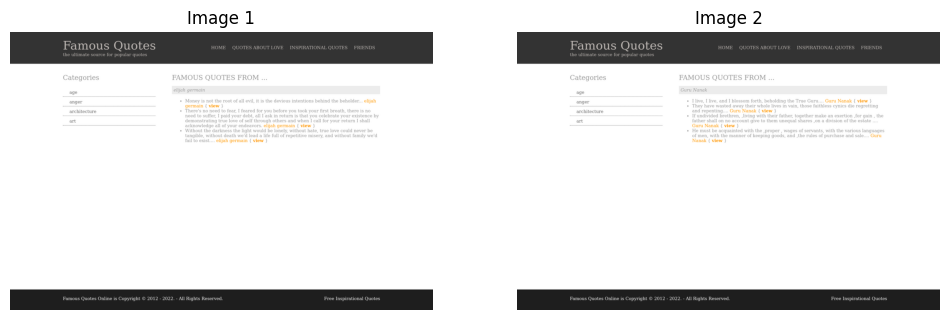

('testset_manual_filtered/15299.png', 'testset_manual_filtered/4300.png', 0.9902627468109131)


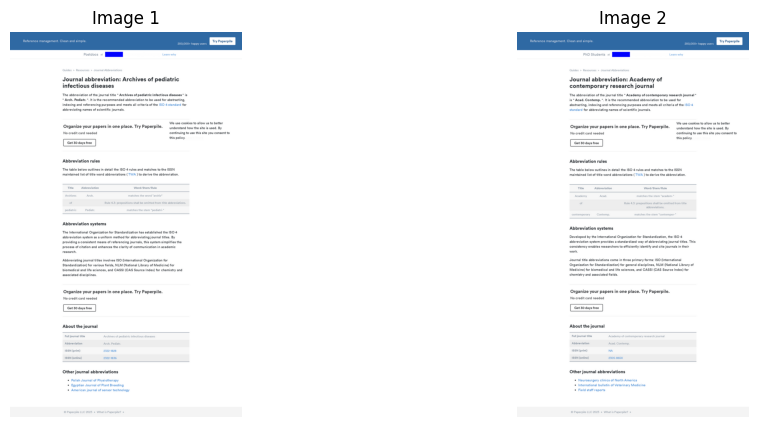

('testset_manual_filtered/12836.png', 'testset_manual_filtered/2040.png', 0.9865319728851318)


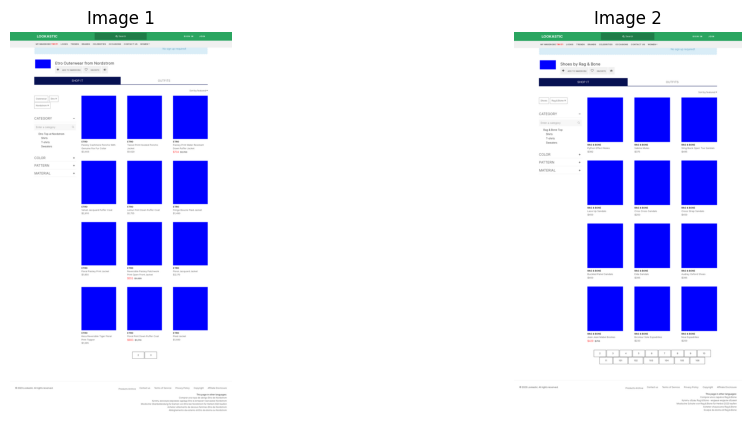

('testset_manual_filtered/10531.png', 'testset_manual_filtered/4260.png', 0.9856567978858948)


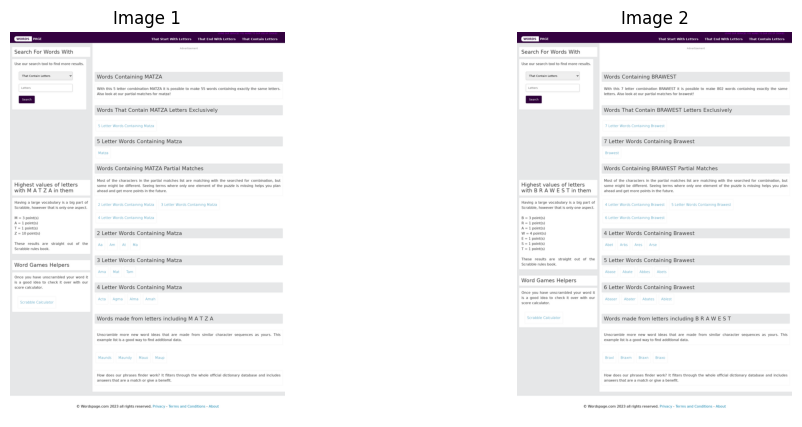

('testset_manual_filtered/6139.png', 'testset_manual_filtered/8795.png', 0.9833219051361084)


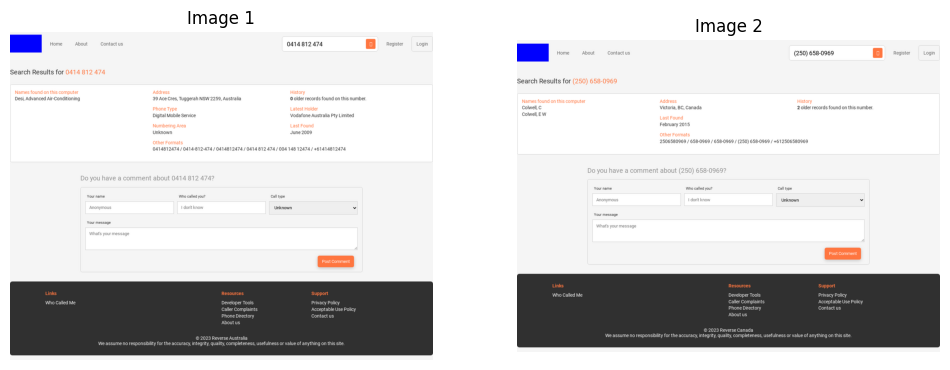

('testset_manual_filtered/5180.png', 'testset_manual_filtered/6753.png', 0.9828375577926636)


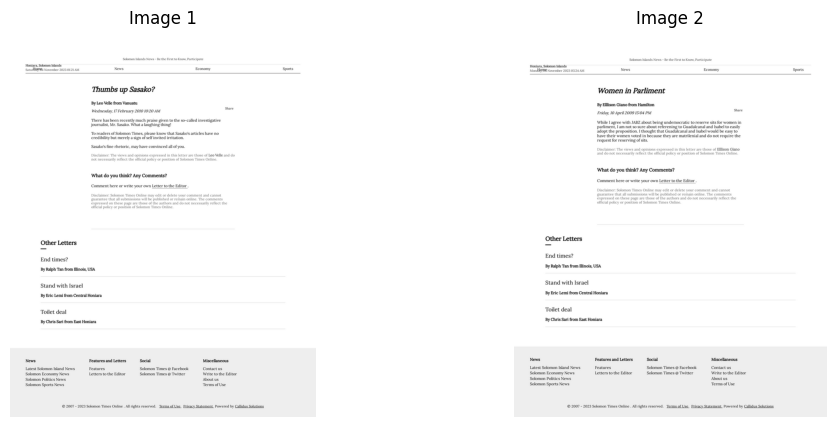

('testset_manual_filtered/2138.png', 'testset_manual_filtered/6169.png', 0.9819562435150146)


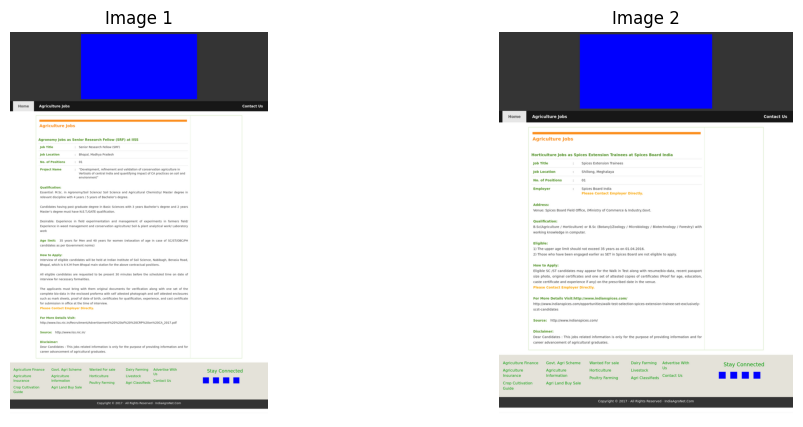

('testset_manual_filtered/16634.png', 'testset_manual_filtered/3273.png', 0.9810791611671448)


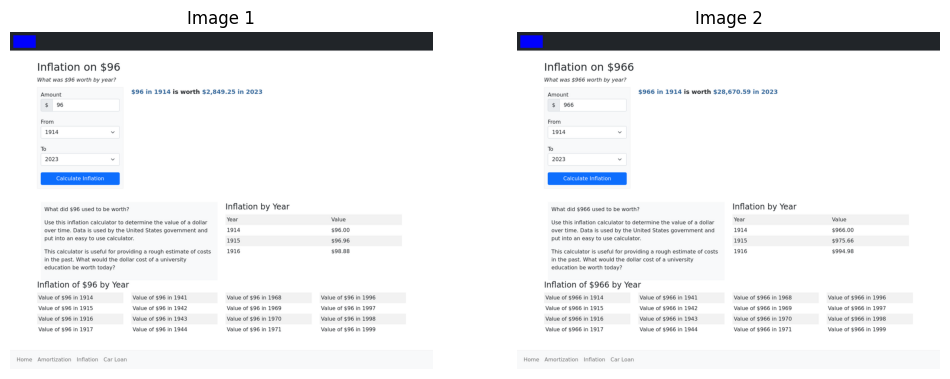

('testset_manual_filtered/9262.png', 'testset_manual_filtered/3011.png', 0.9778484106063843)


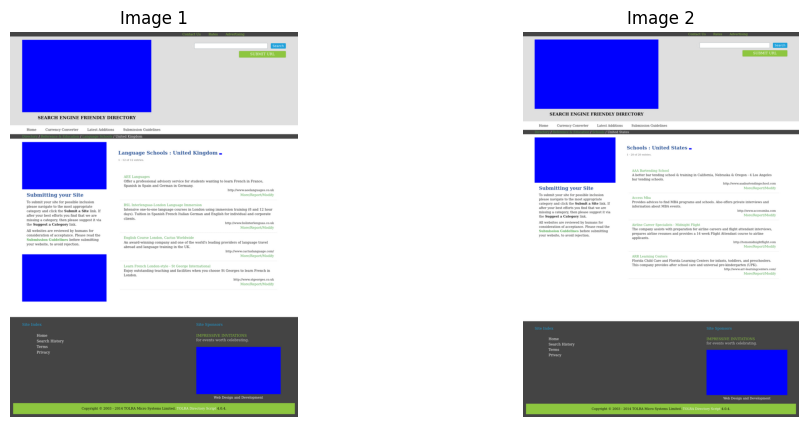

('testset_manual_filtered/8389.png', 'testset_manual_filtered/11350.png', 0.9761397838592529)


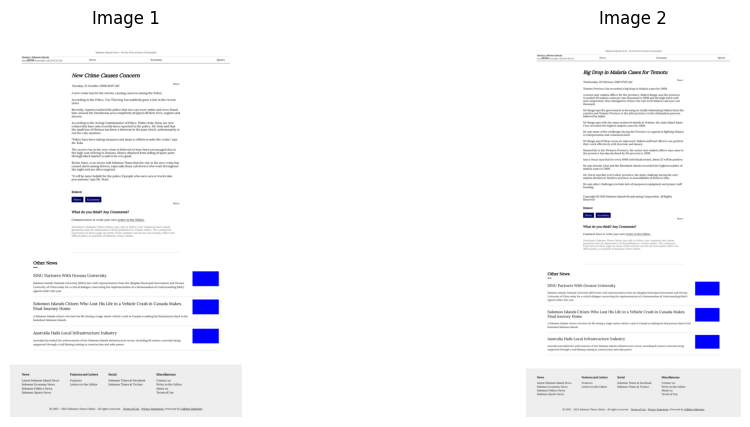

('testset_manual_filtered/1802.png', 'testset_manual_filtered/12875.png', 0.9752130508422852)


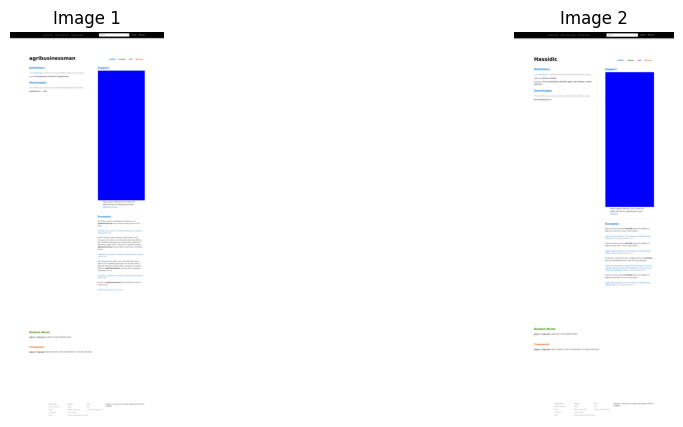

('testset_manual_filtered/8998.png', 'testset_manual_filtered/4408.png', 0.9739065170288086)


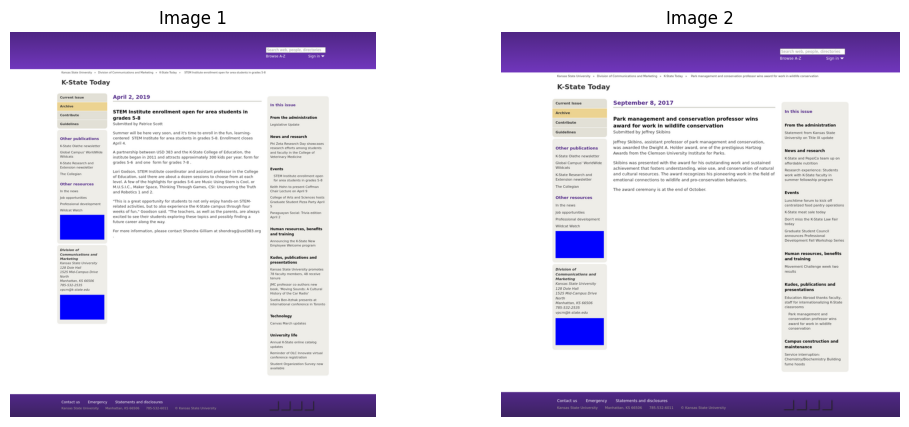

('testset_manual_filtered/851.png', 'testset_manual_filtered/4408.png', 0.972556471824646)


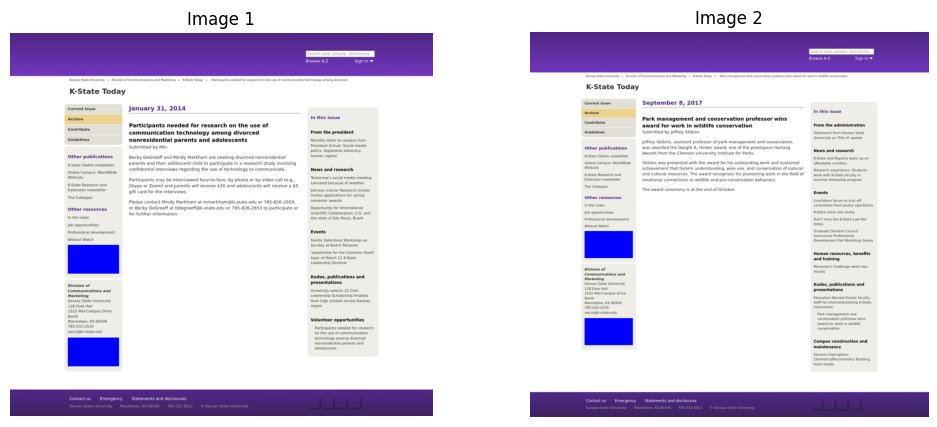

('testset_manual_filtered/9545.png', 'testset_manual_filtered/11487.png', 0.9721041917800903)


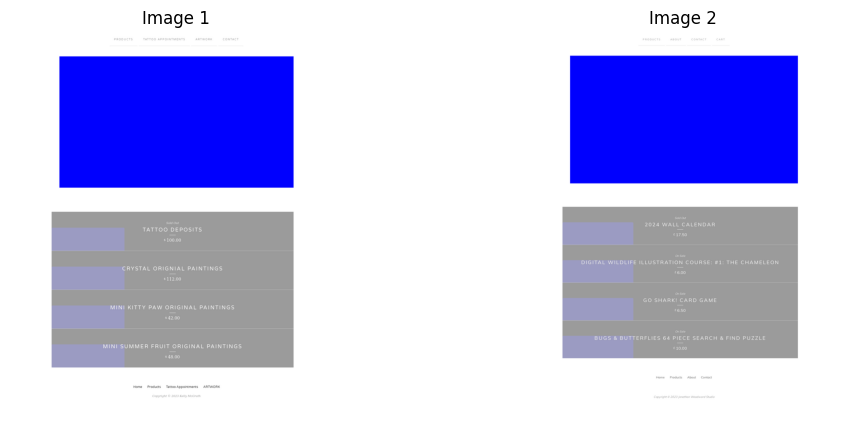

('testset_manual_filtered/16634.png', 'testset_manual_filtered/10821.png', 0.9712745547294617)


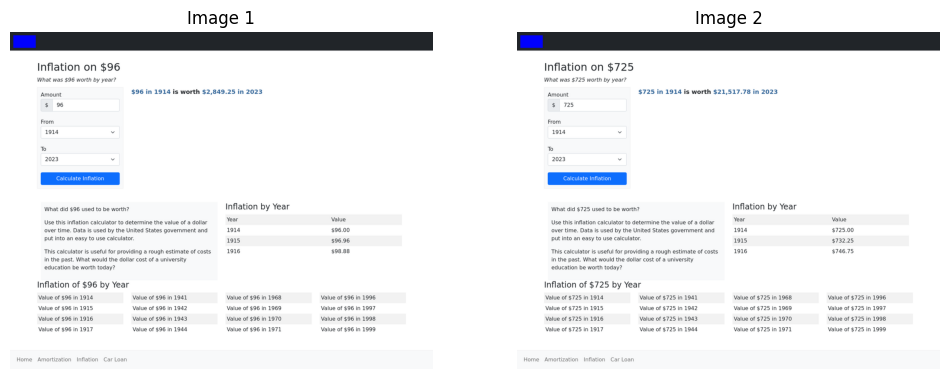

('testset_manual_filtered/7125.png', 'testset_manual_filtered/14328.png', 0.9703754782676697)


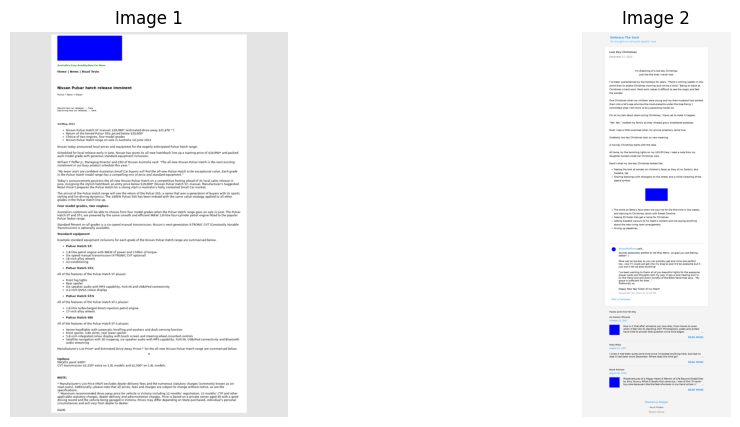

('testset_manual_filtered/9276.png', 'testset_manual_filtered/12511.png', 0.9697309732437134)


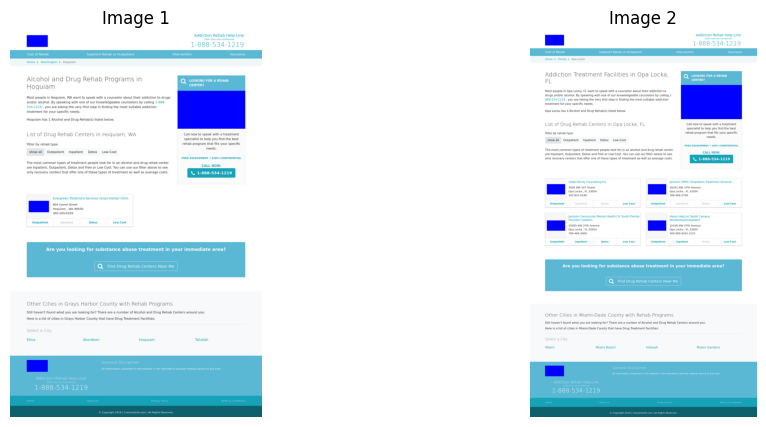

('testset_manual_filtered/10821.png', 'testset_manual_filtered/3273.png', 0.9682712554931641)


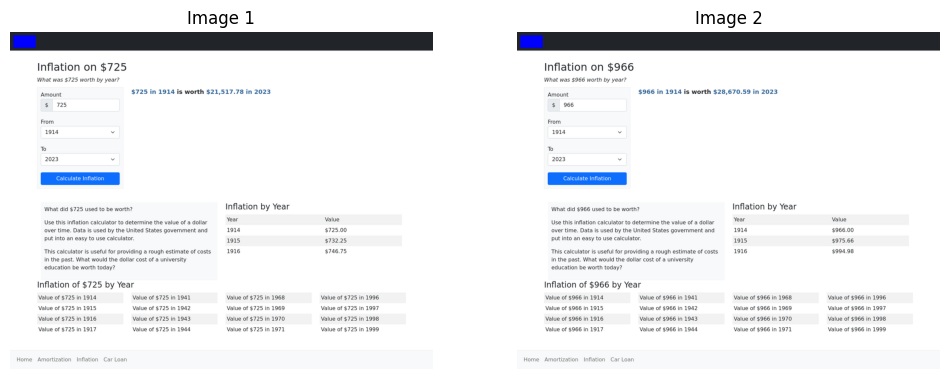

('testset_manual_filtered/4277.png', 'testset_manual_filtered/13465.png', 0.9667337536811829)


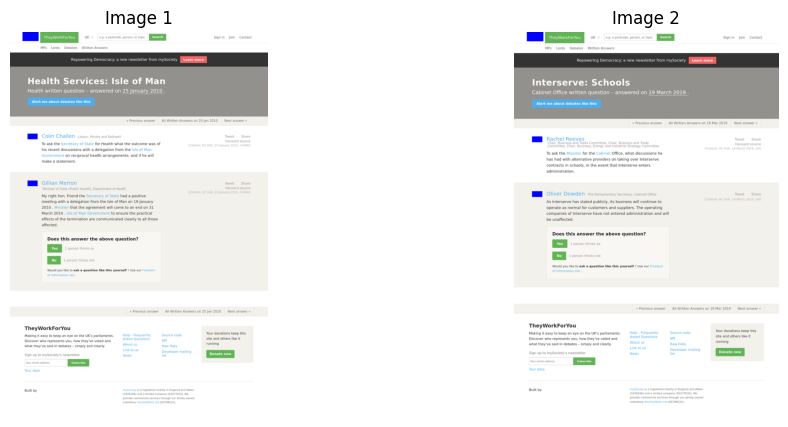

('testset_manual_filtered/2930.png', 'testset_manual_filtered/29.png', 0.961288332939148)


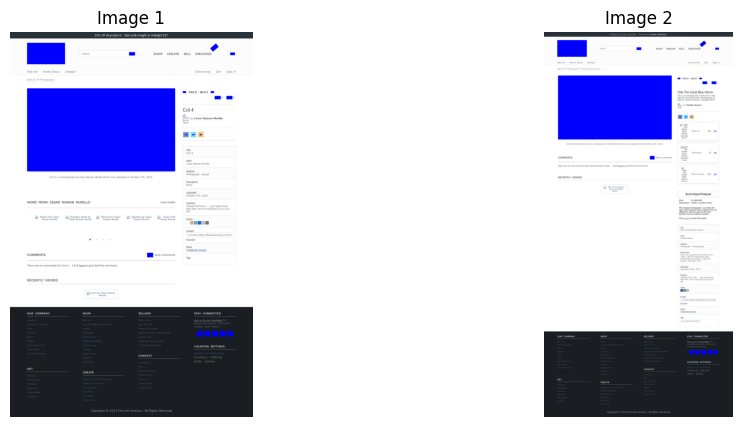

('testset_manual_filtered/5668.png', 'testset_manual_filtered/123.png', 0.9611589908599854)


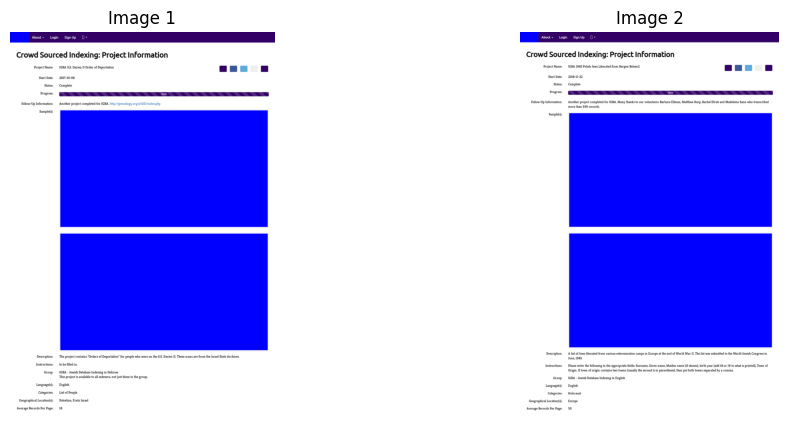

('testset_manual_filtered/16591.png', 'testset_manual_filtered/3949.png', 0.9579845666885376)


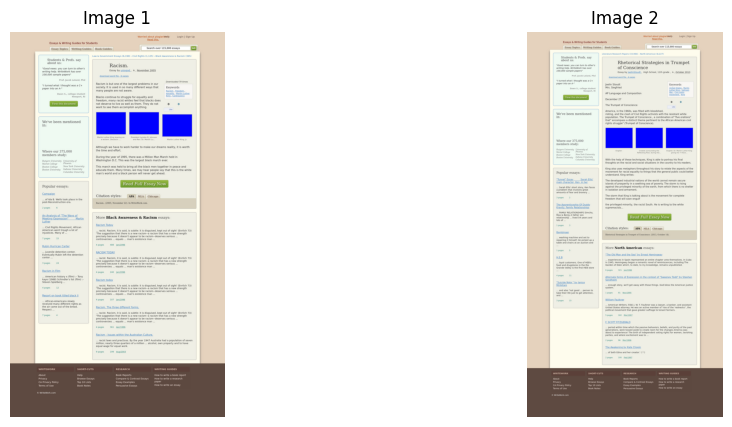

('testset_manual_filtered/2106.png', 'testset_manual_filtered/3082.png', 0.9575670957565308)


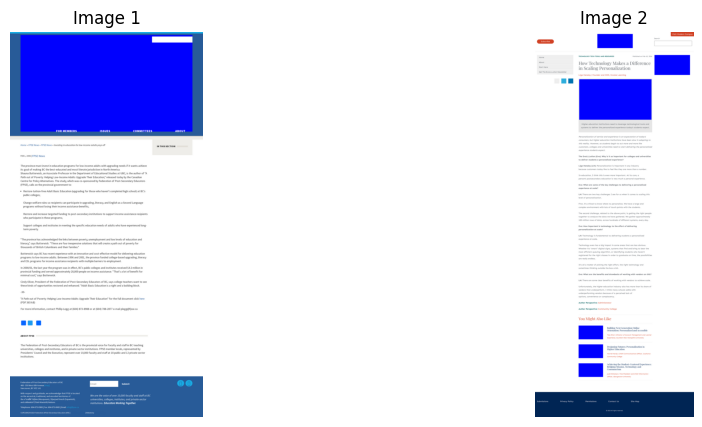

('testset_manual_filtered/8706.png', 'testset_manual_filtered/3879.png', 0.9564449787139893)


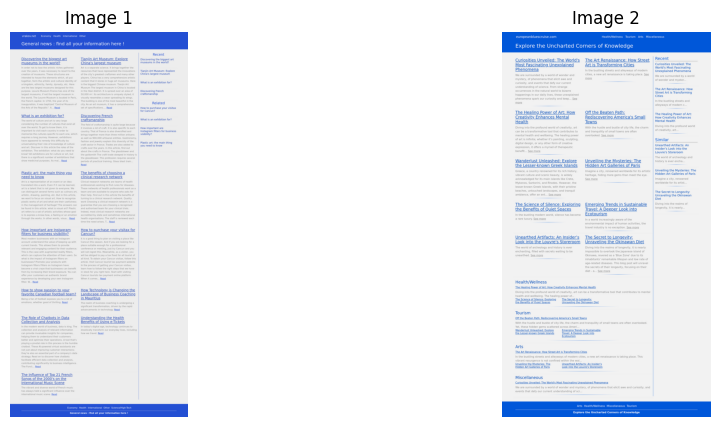

('testset_manual_filtered/11200.png', 'testset_manual_filtered/2106.png', 0.9561145901679993)


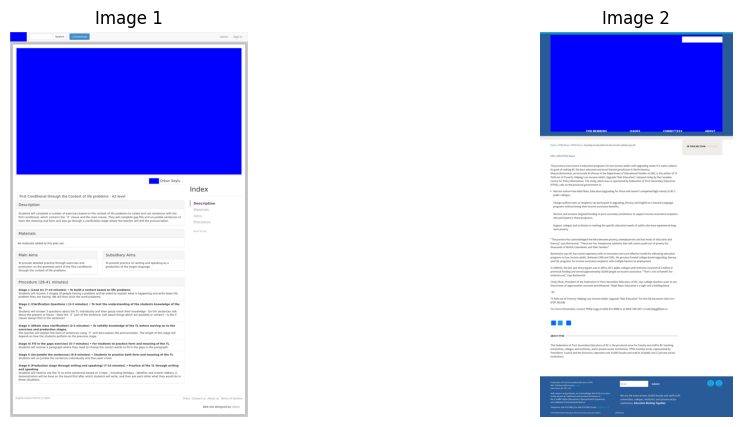

('testset_manual_filtered/8389.png', 'testset_manual_filtered/6753.png', 0.9554397463798523)


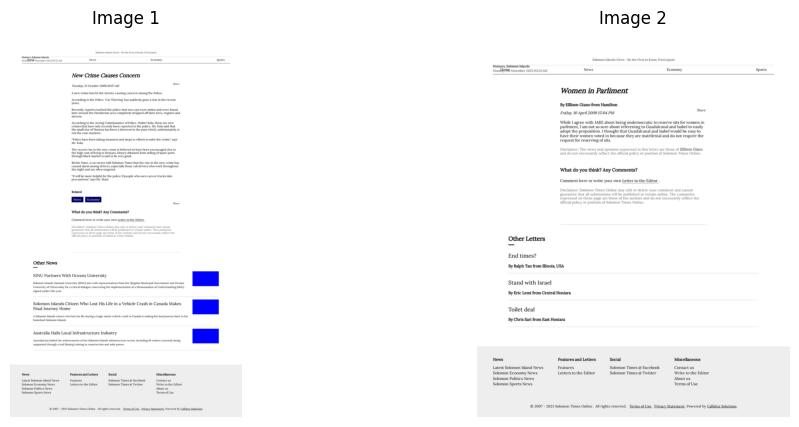

('testset_manual_filtered/851.png', 'testset_manual_filtered/8998.png', 0.955427348613739)


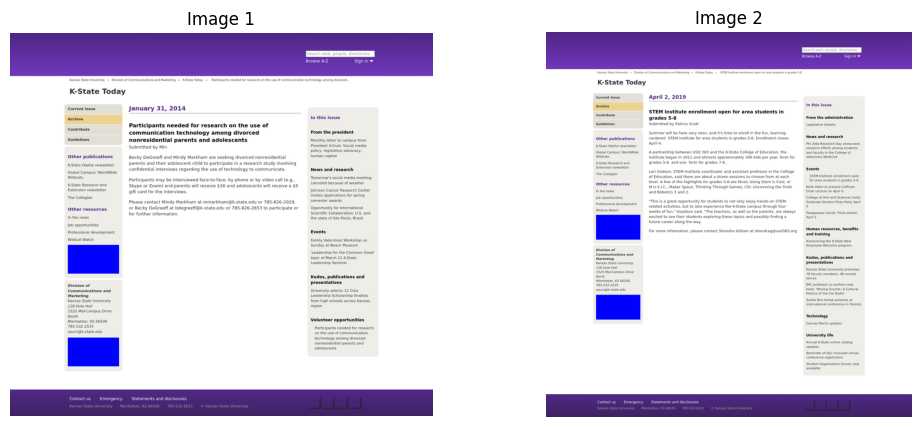

('testset_manual_filtered/2106.png', 'testset_manual_filtered/8034.png', 0.9553819894790649)


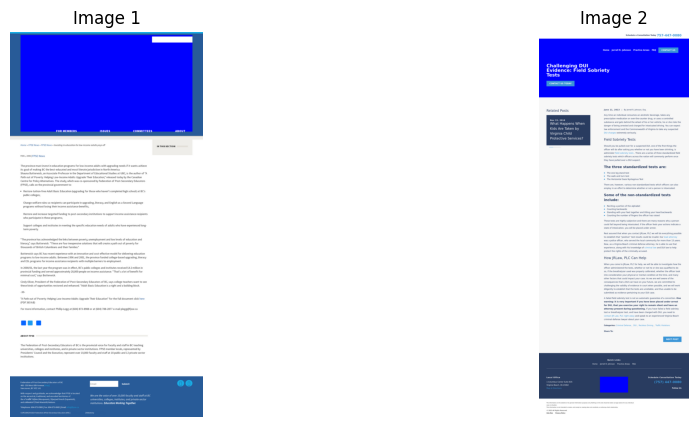

('testset_manual_filtered/7125.png', 'testset_manual_filtered/11099.png', 0.9548012018203735)


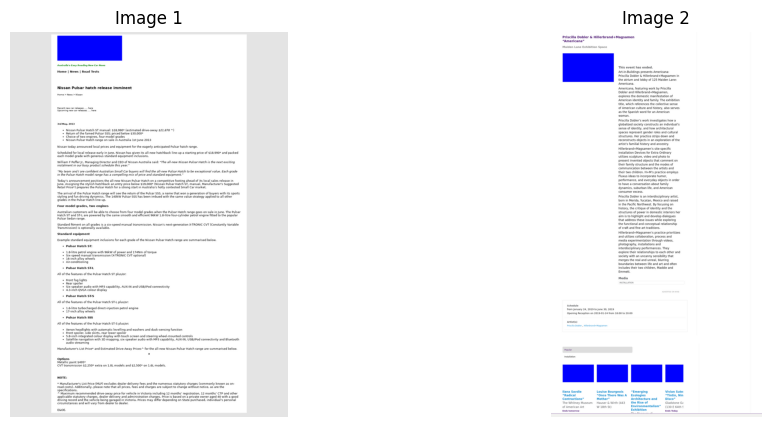

('testset_manual_filtered/2106.png', 'testset_manual_filtered/790.png', 0.954643964767456)


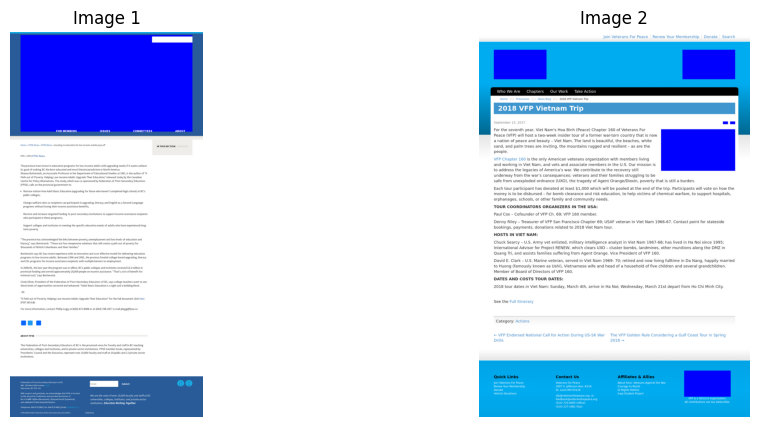

('testset_manual_filtered/3585.png', 'testset_manual_filtered/309.png', 0.9543858170509338)


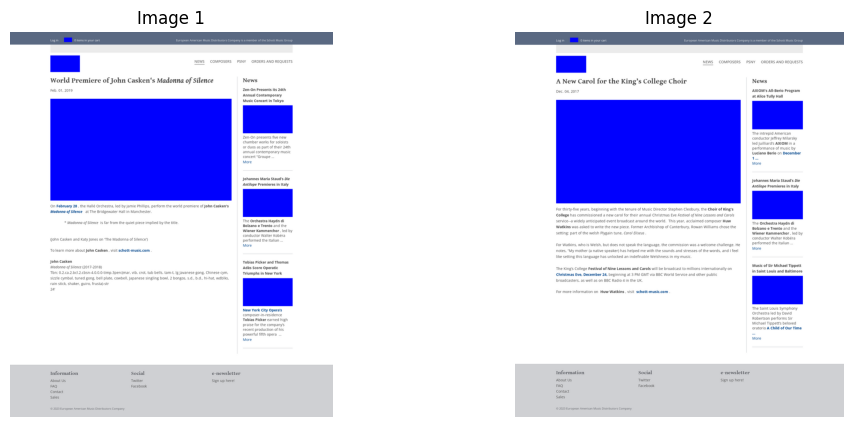

('testset_manual_filtered/9898.png', 'testset_manual_filtered/102.png', 0.9533681869506836)


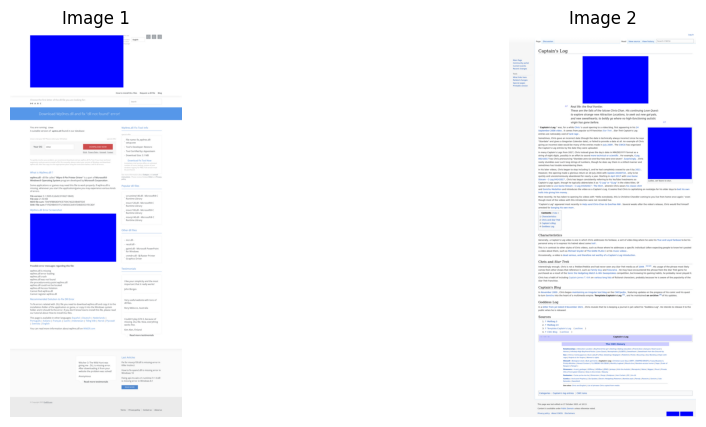

('testset_manual_filtered/8389.png', 'testset_manual_filtered/5180.png', 0.9518623948097229)


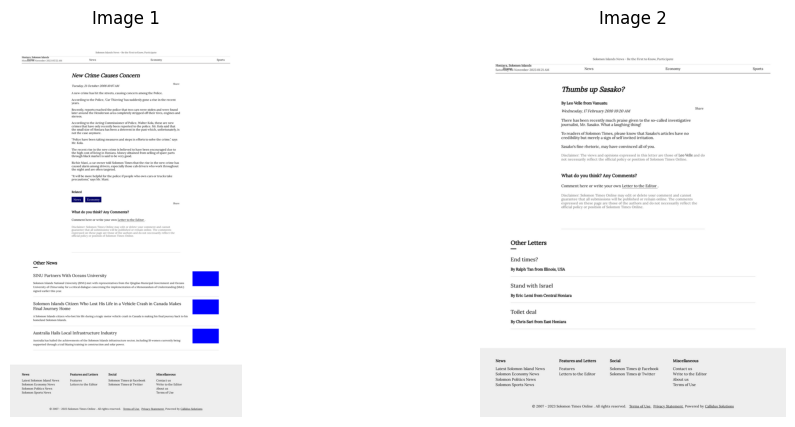

('testset_manual_filtered/11981.png', 'testset_manual_filtered/2106.png', 0.9515128135681152)


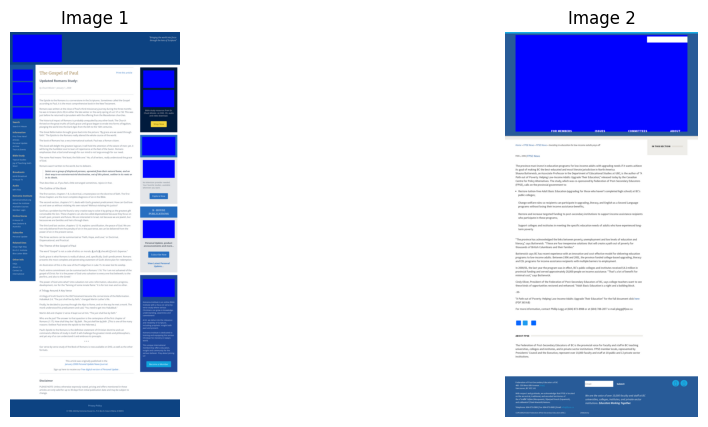

('testset_manual_filtered/11099.png', 'testset_manual_filtered/14328.png', 0.9489545822143555)


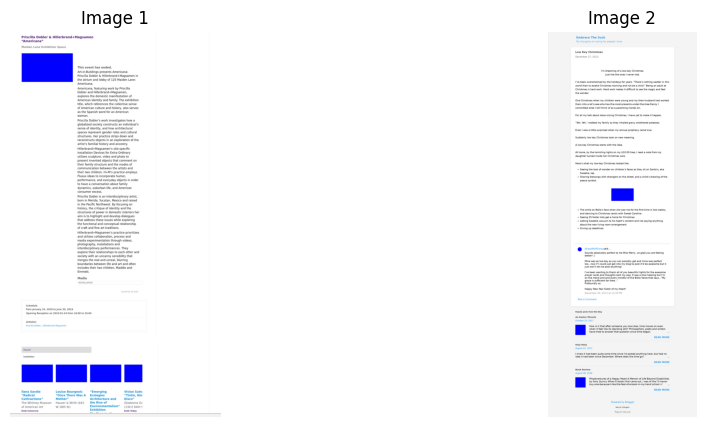

('testset_manual_filtered/15603.png', 'testset_manual_filtered/3270.png', 0.948246955871582)


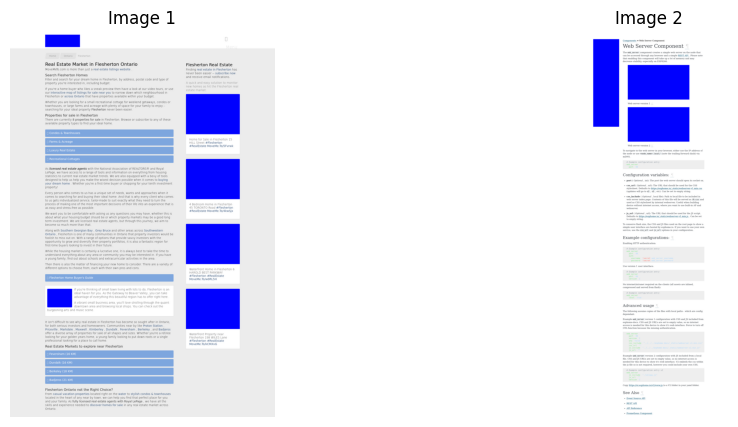

('testset_manual_filtered/2106.png', 'testset_manual_filtered/1942.png', 0.9468059539794922)


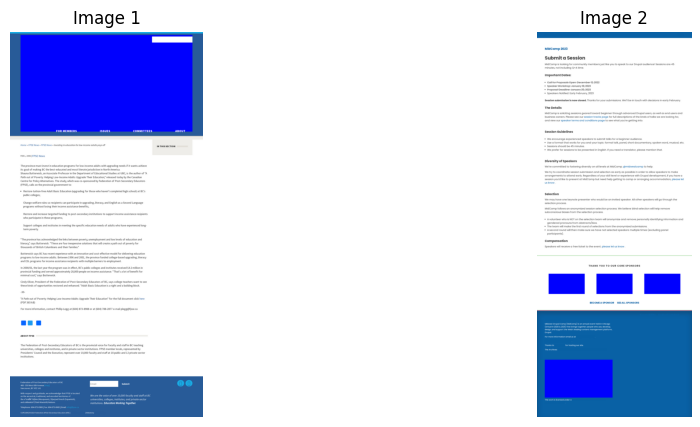

In [4]:
import matplotlib.pyplot as plt

def show_images_side_by_side(image_path1, image_path2):
    # Load the images
    img1 = Image.open(image_path1)
    img2 = Image.open(image_path2)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the first image
    axes[0].imshow(img1)
    axes[0].axis('off')  # Turn off axis numbers and ticks
    axes[0].set_title('Image 1')

    # Display the second image
    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title('Image 2')

    # Show the plot
    plt.show()

for pair in similarities[:50]:
    print(pair)
    show_images_side_by_side(pair[0], pair[1])

('testset_manual_filtered/4630.png', 'testset_manual_filtered/13794.png', 0.9467380046844482)


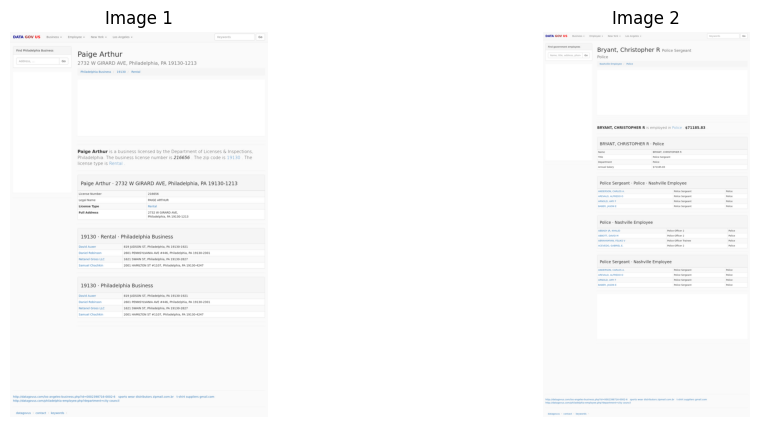

('testset_manual_filtered/2106.png', 'testset_manual_filtered/5606.png', 0.9464952945709229)


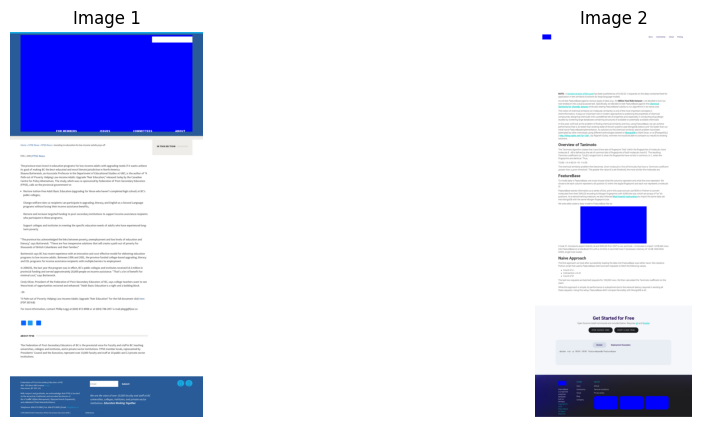

('testset_manual_filtered/2106.png', 'testset_manual_filtered/3848.png', 0.9463772773742676)


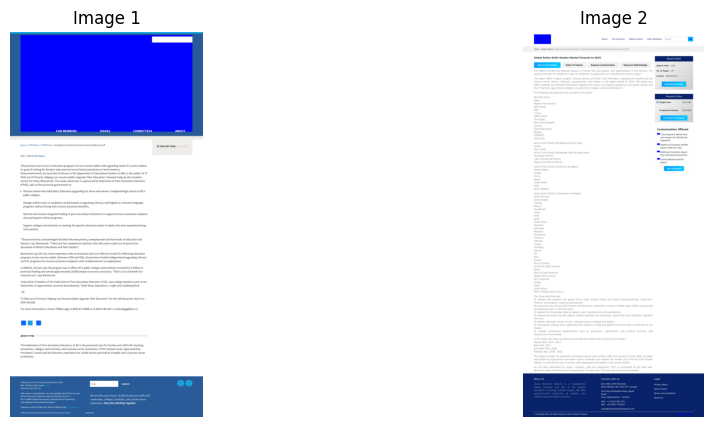

('testset_manual_filtered/9050.png', 'testset_manual_filtered/4084.png', 0.9459539651870728)


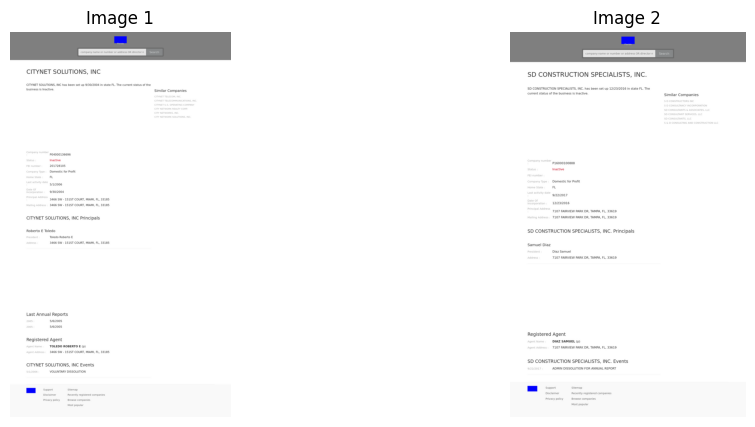

('testset_manual_filtered/2885.png', 'testset_manual_filtered/15097.png', 0.9455625414848328)


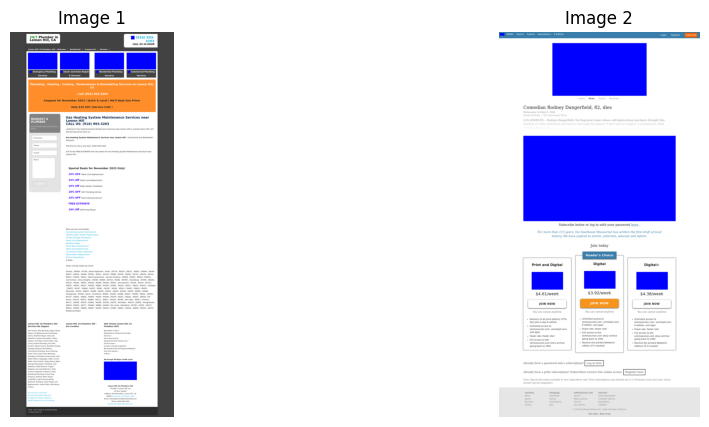

('testset_manual_filtered/11697.png', 'testset_manual_filtered/15097.png', 0.9454947710037231)


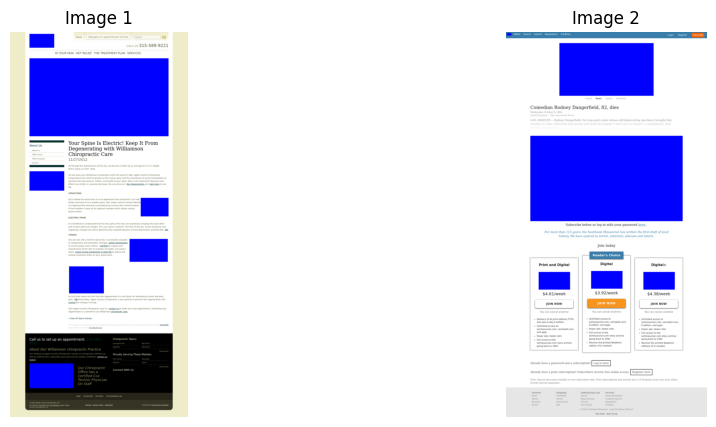

('testset_manual_filtered/9898.png', 'testset_manual_filtered/16940.png', 0.9447040557861328)


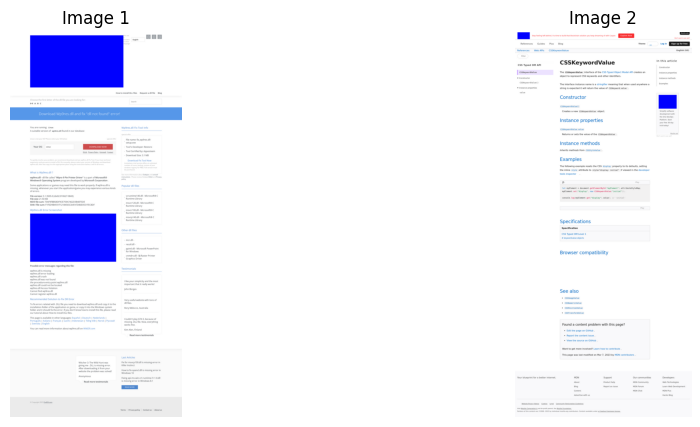

('testset_manual_filtered/12144.png', 'testset_manual_filtered/11625.png', 0.9446606040000916)


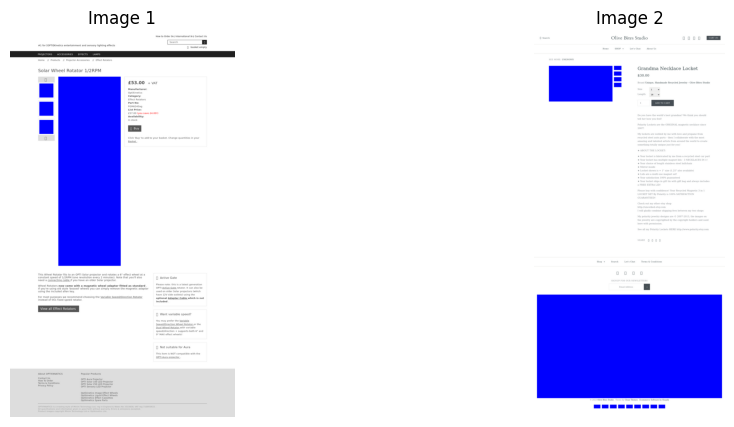

('testset_manual_filtered/14378.png', 'testset_manual_filtered/16940.png', 0.9442970156669617)


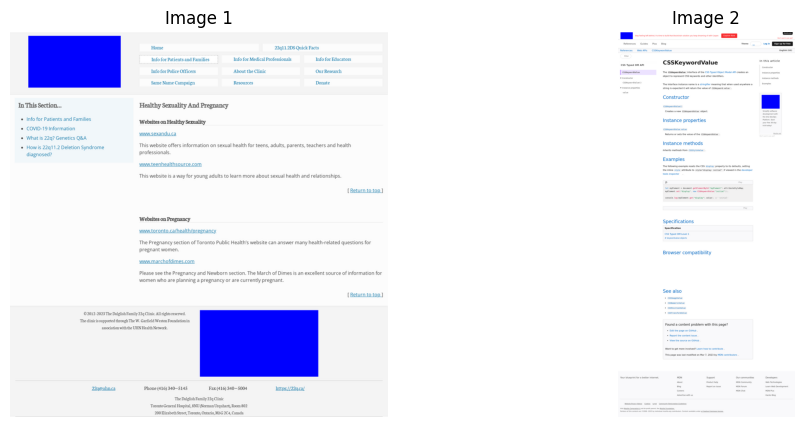

('testset_manual_filtered/1022.png', 'testset_manual_filtered/1519.png', 0.9439083337783813)


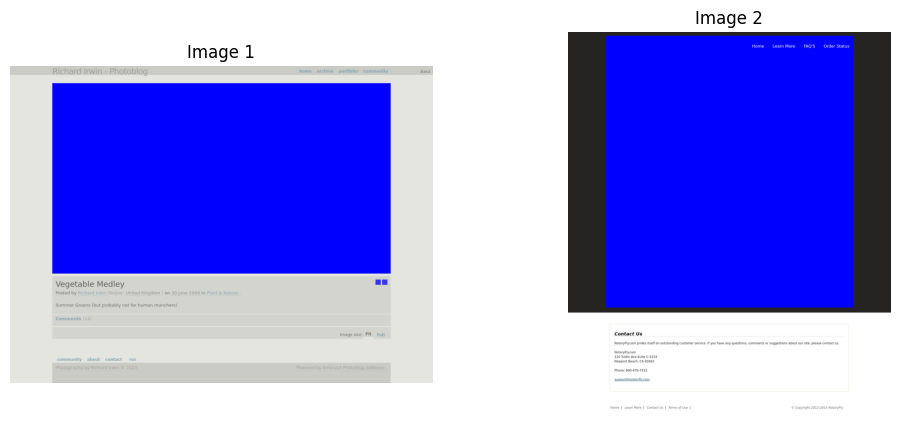

('testset_manual_filtered/10021.png', 'testset_manual_filtered/102.png', 0.9436560273170471)


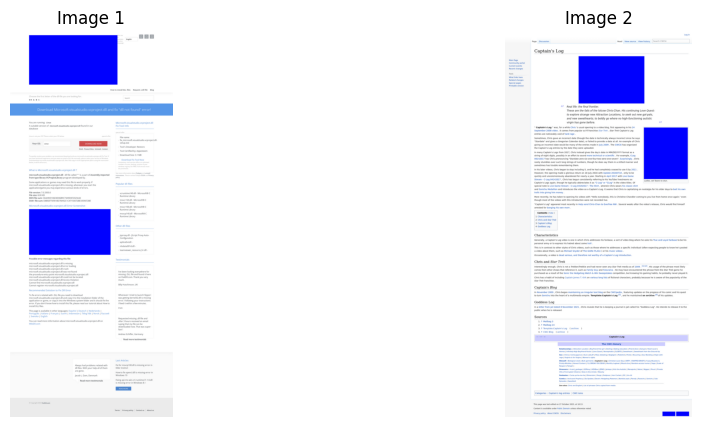

('testset_manual_filtered/2106.png', 'testset_manual_filtered/2312.png', 0.943303108215332)


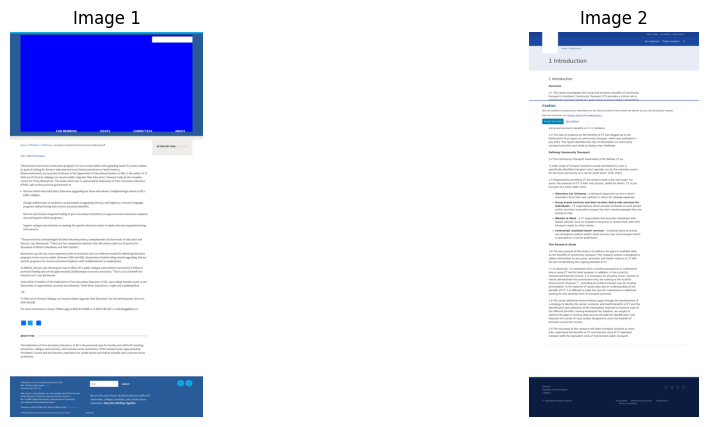

('testset_manual_filtered/13688.png', 'testset_manual_filtered/4272.png', 0.9423382878303528)


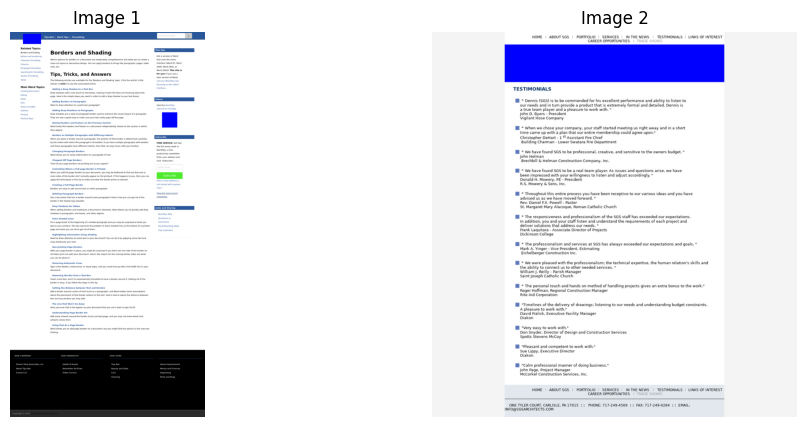

('testset_manual_filtered/102.png', 'testset_manual_filtered/3270.png', 0.9420967698097229)


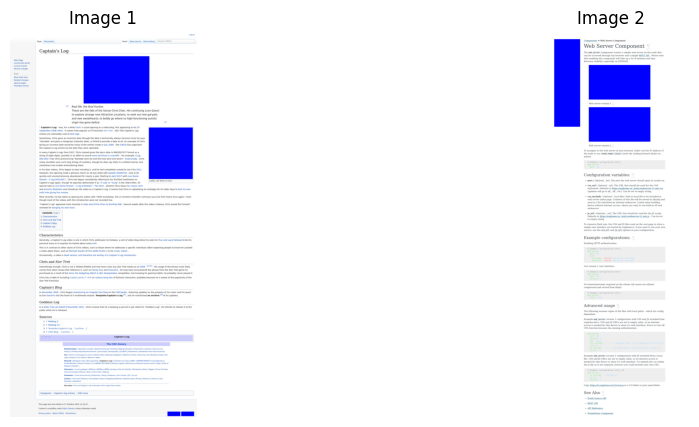

('testset_manual_filtered/11697.png', 'testset_manual_filtered/11051.png', 0.9419856071472168)


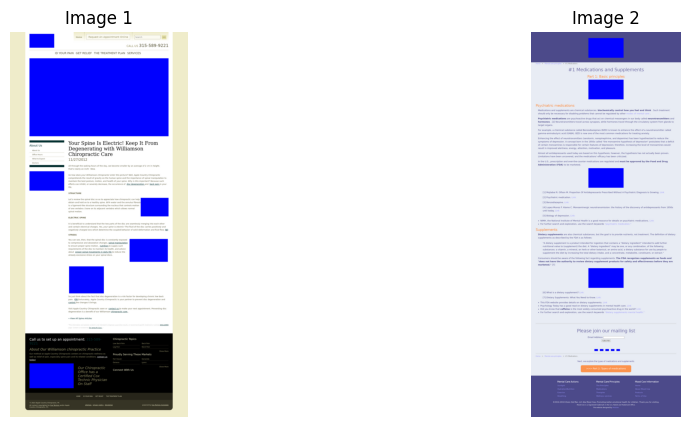

('testset_manual_filtered/17009.png', 'testset_manual_filtered/9276.png', 0.9418737292289734)


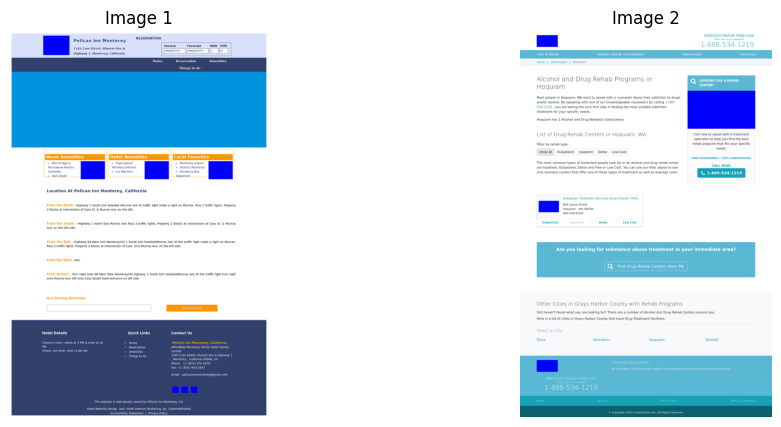

('testset_manual_filtered/14328.png', 'testset_manual_filtered/3270.png', 0.9417487978935242)


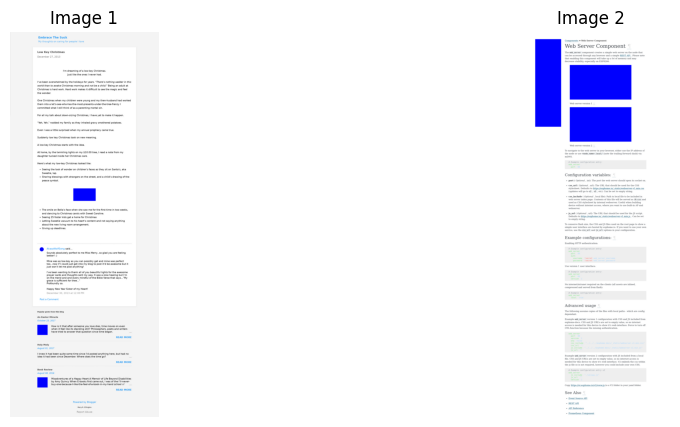

('testset_manual_filtered/885.png', 'testset_manual_filtered/3536.png', 0.9417259693145752)


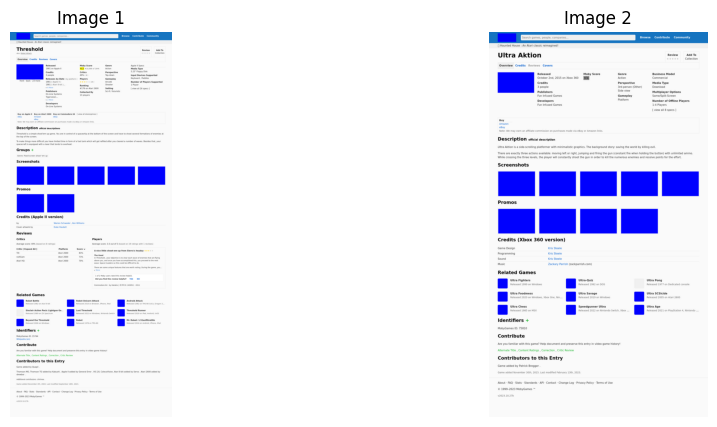

('testset_manual_filtered/2328.png', 'testset_manual_filtered/1673.png', 0.9417029023170471)


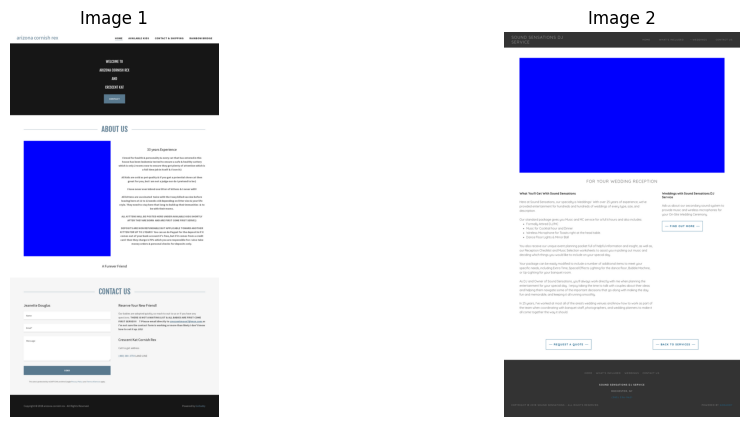

('testset_manual_filtered/10726.png', 'testset_manual_filtered/9050.png', 0.9406188130378723)


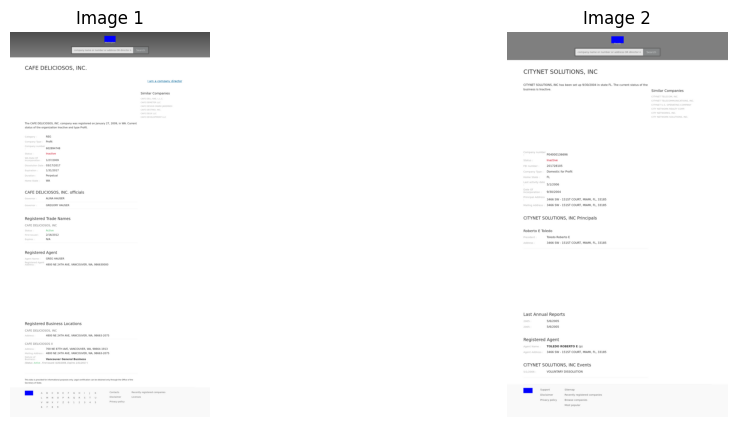

('testset_manual_filtered/9898.png', 'testset_manual_filtered/13472.png', 0.9402167201042175)


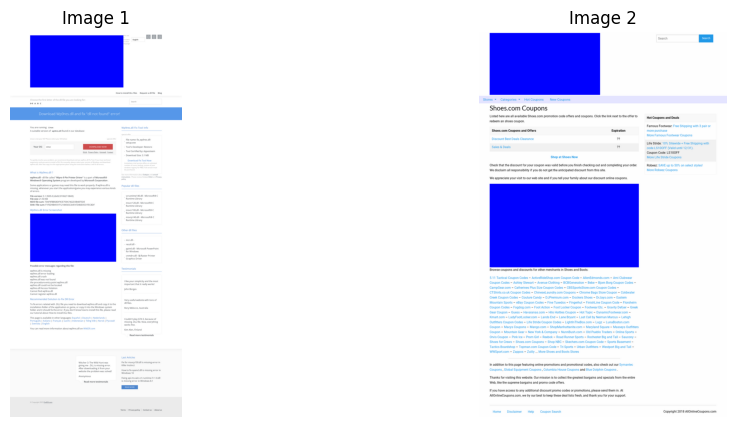

('testset_manual_filtered/4956.png', 'testset_manual_filtered/11697.png', 0.9401558041572571)


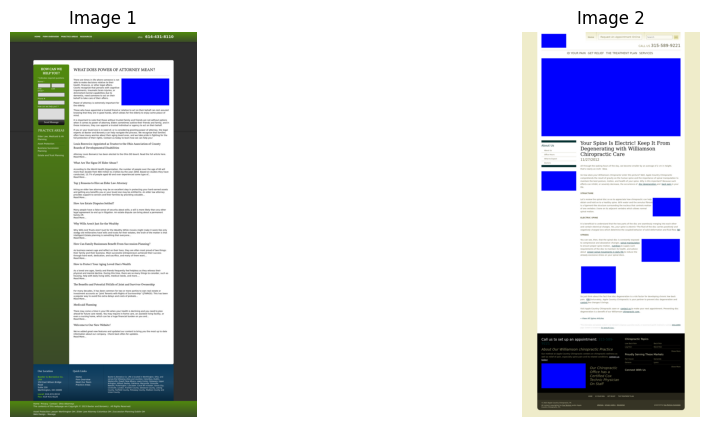

('testset_manual_filtered/10021.png', 'testset_manual_filtered/13472.png', 0.9401161074638367)


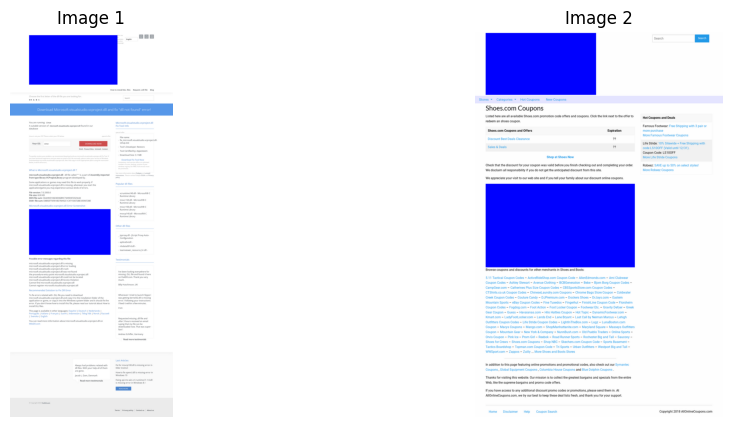

('testset_manual_filtered/777.png', 'testset_manual_filtered/5180.png', 0.9400972127914429)


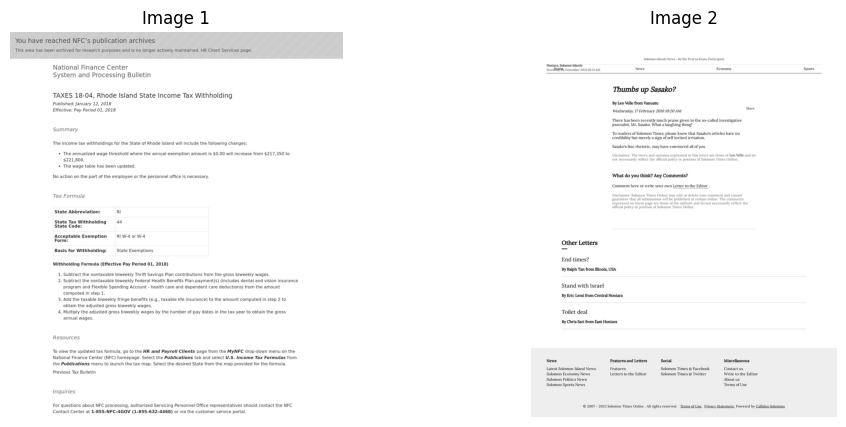

('testset_manual_filtered/2106.png', 'testset_manual_filtered/1673.png', 0.9400045275688171)


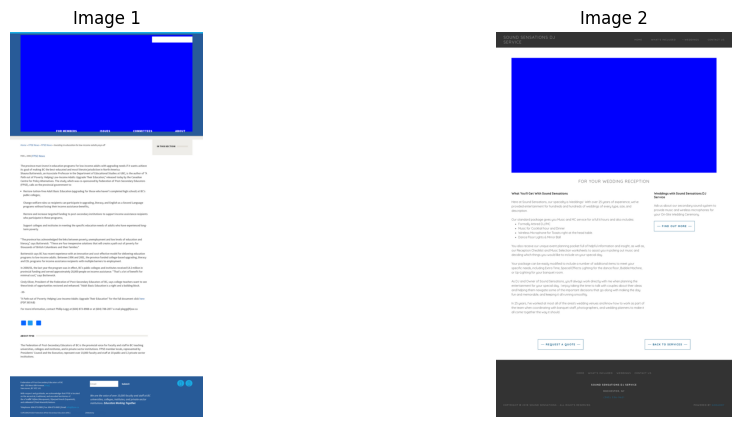

('testset_manual_filtered/777.png', 'testset_manual_filtered/359.png', 0.9398872256278992)


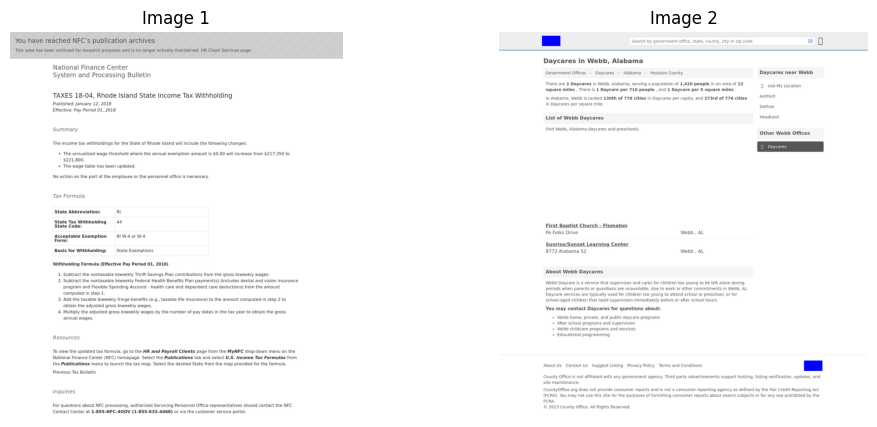

('testset_manual_filtered/1527.png', 'testset_manual_filtered/15385.png', 0.9398438930511475)


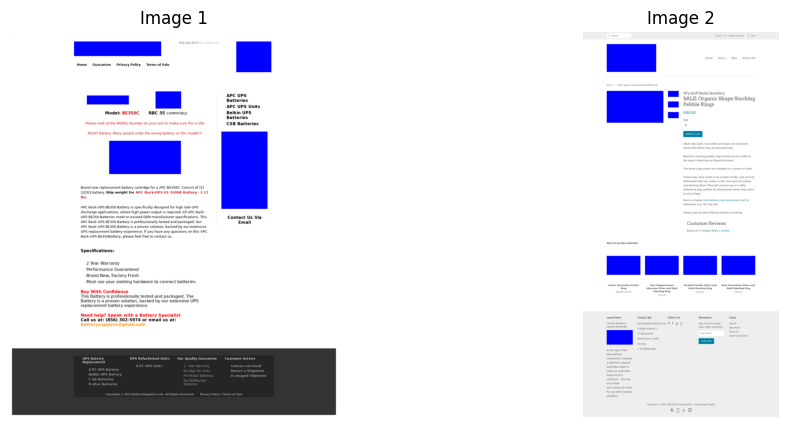

('testset_manual_filtered/11200.png', 'testset_manual_filtered/102.png', 0.9396553635597229)


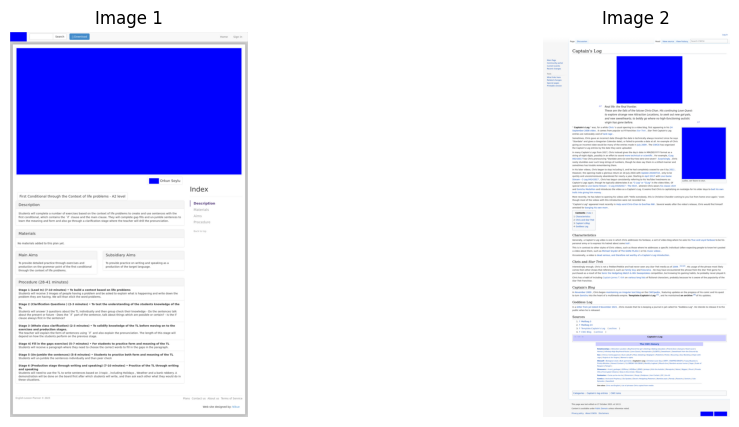

('testset_manual_filtered/8366.png', 'testset_manual_filtered/8926.png', 0.9396361112594604)


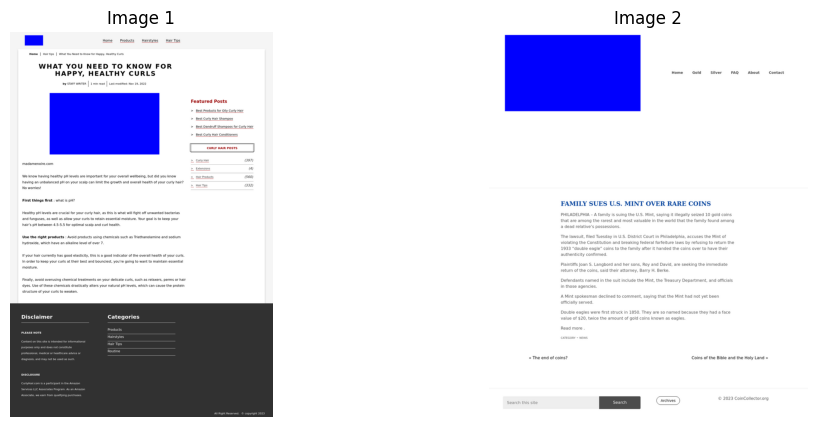

('testset_manual_filtered/6954.png', 'testset_manual_filtered/12969.png', 0.9391868710517883)


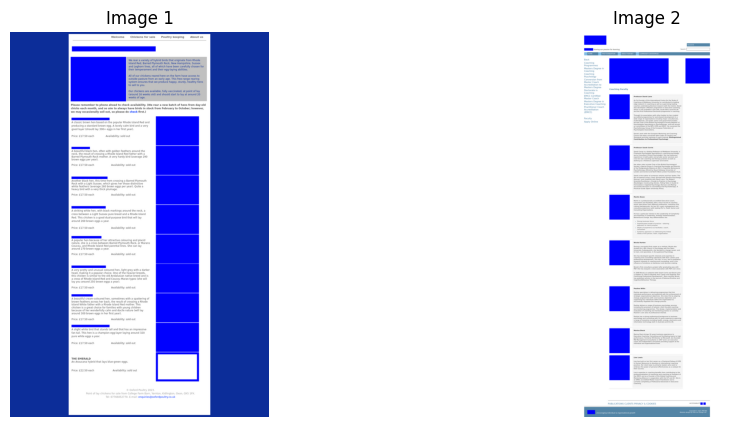

('testset_manual_filtered/102.png', 'testset_manual_filtered/13472.png', 0.9390026330947876)


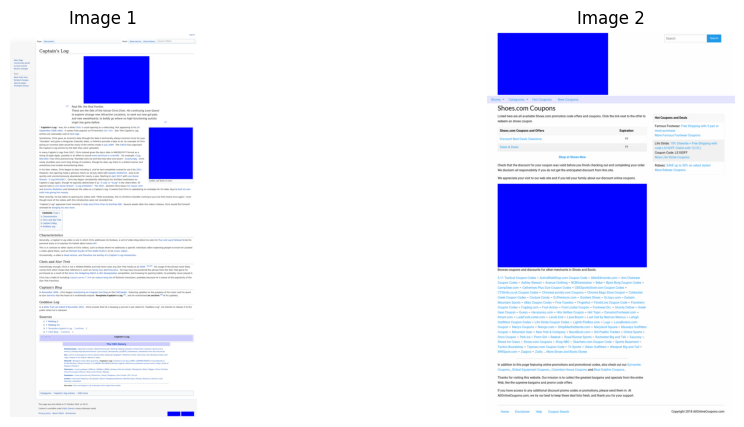

('testset_manual_filtered/3082.png', 'testset_manual_filtered/5606.png', 0.9388861060142517)


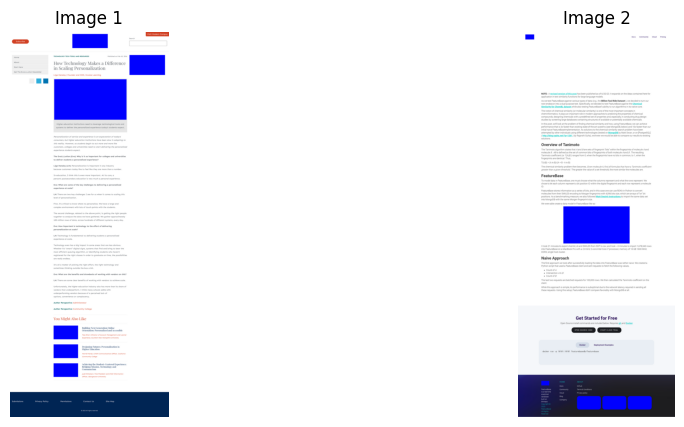

('testset_manual_filtered/10021.png', 'testset_manual_filtered/16940.png', 0.9386547803878784)


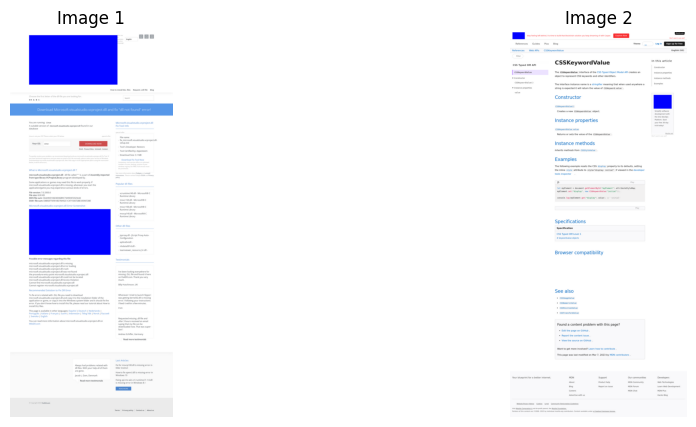

('testset_manual_filtered/885.png', 'testset_manual_filtered/9950.png', 0.9384087920188904)


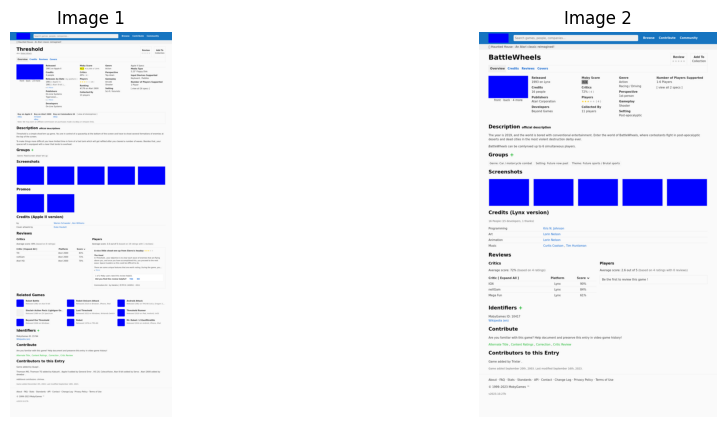

('testset_manual_filtered/8911.png', 'testset_manual_filtered/11697.png', 0.9383200407028198)


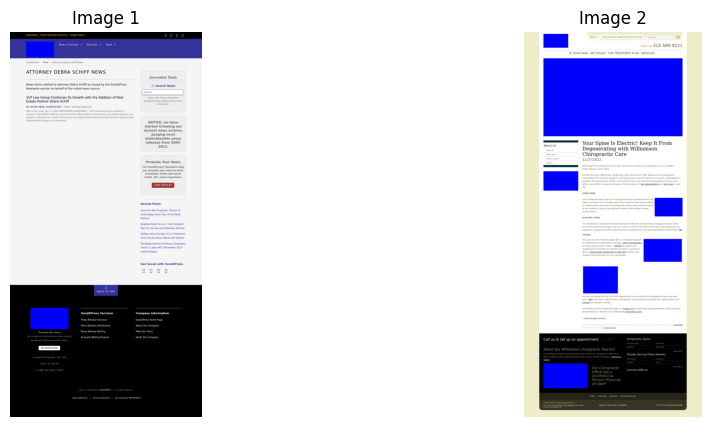

('testset_manual_filtered/2222.png', 'testset_manual_filtered/11384.png', 0.9383183717727661)


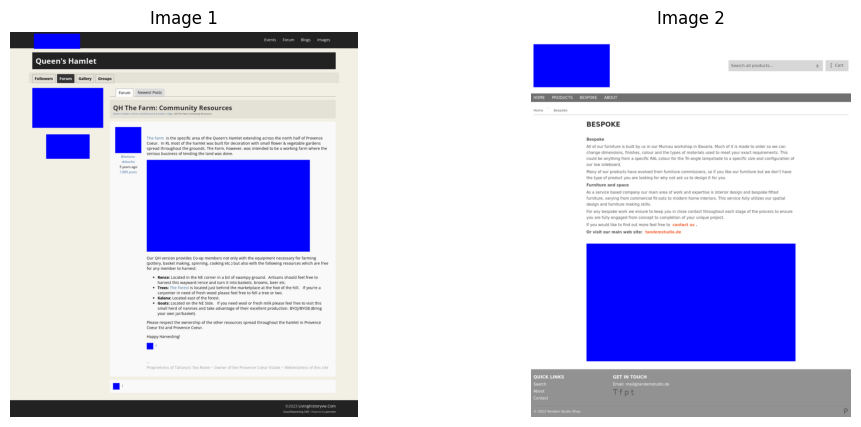

('testset_manual_filtered/15385.png', 'testset_manual_filtered/8091.png', 0.9379825592041016)


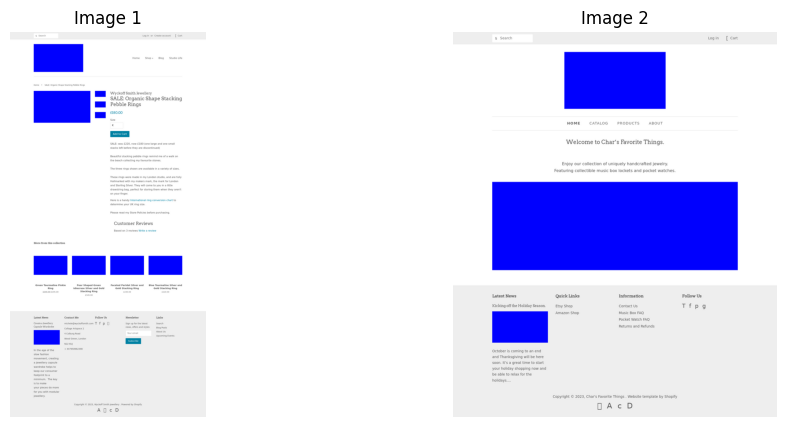

('testset_manual_filtered/9720.png', 'testset_manual_filtered/265.png', 0.9377949237823486)


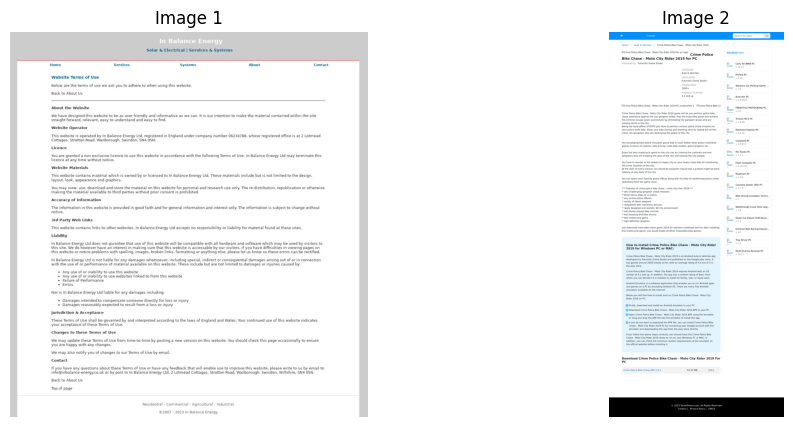

('testset_manual_filtered/15745.png', 'testset_manual_filtered/16940.png', 0.937744677066803)


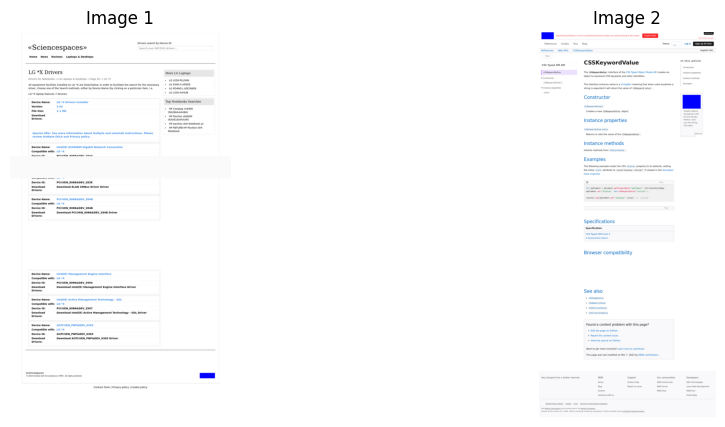

('testset_manual_filtered/11465.png', 'testset_manual_filtered/17540.png', 0.9375950694084167)


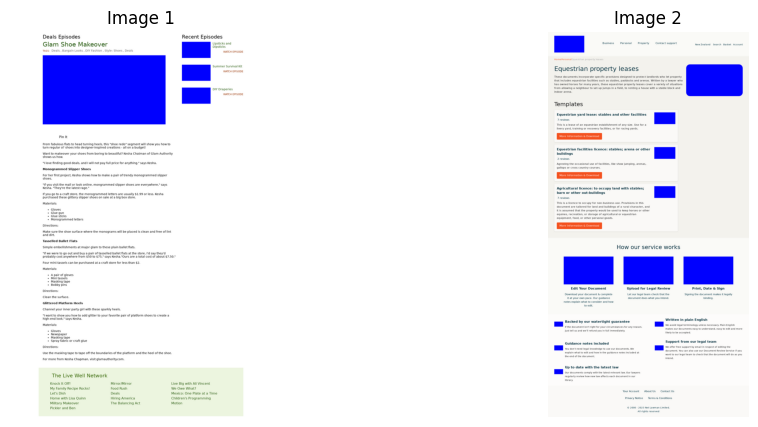

('testset_manual_filtered/13472.png', 'testset_manual_filtered/16940.png', 0.9375913739204407)


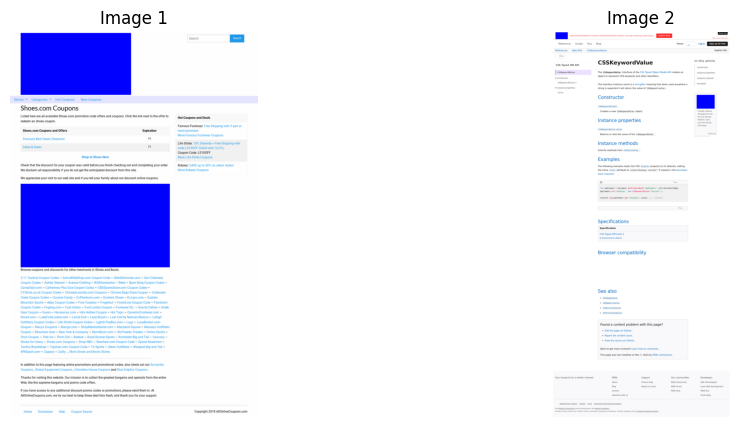

('testset_manual_filtered/3536.png', 'testset_manual_filtered/9950.png', 0.937413215637207)


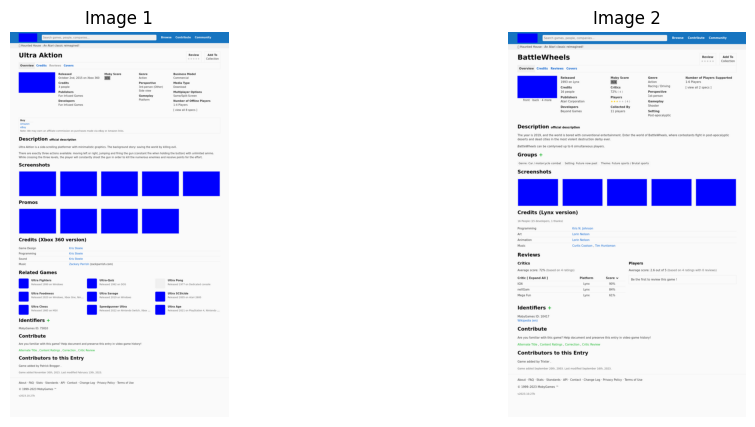

('testset_manual_filtered/10726.png', 'testset_manual_filtered/4084.png', 0.9373802542686462)


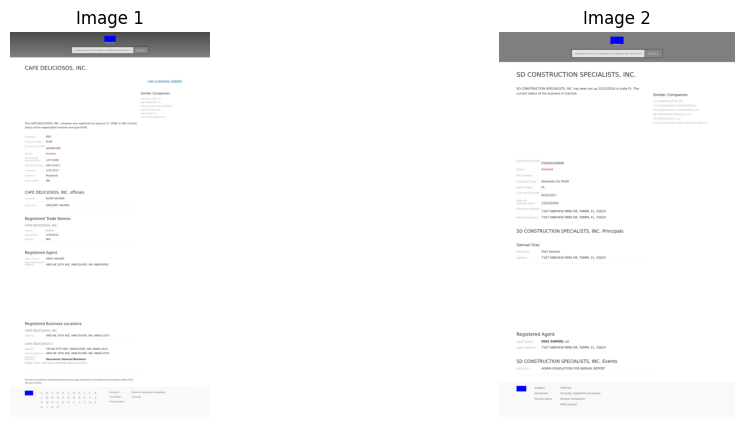

('testset_manual_filtered/10021.png', 'testset_manual_filtered/15097.png', 0.9372676014900208)


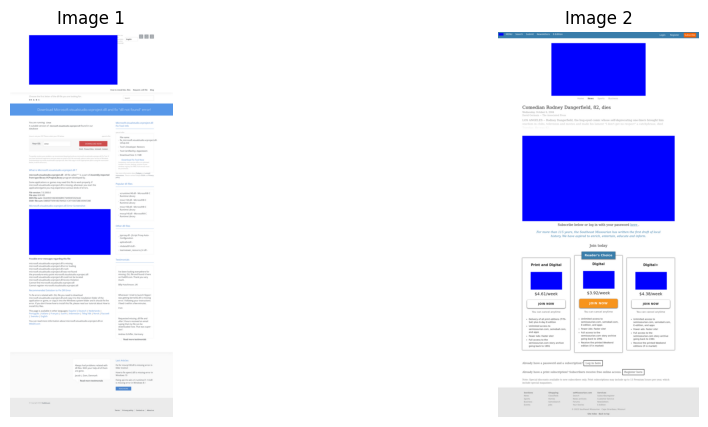

('testset_manual_filtered/15603.png', 'testset_manual_filtered/10186.png', 0.9372400641441345)


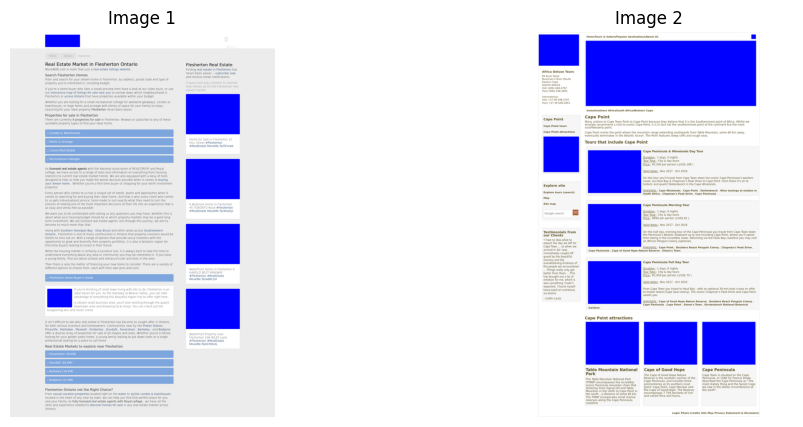

('testset_manual_filtered/14328.png', 'testset_manual_filtered/14604.png', 0.9371027946472168)


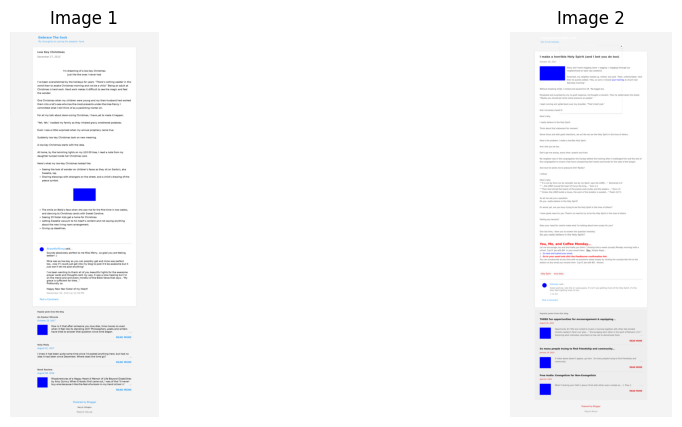

('testset_manual_filtered/3848.png', 'testset_manual_filtered/12166.png', 0.9370815753936768)


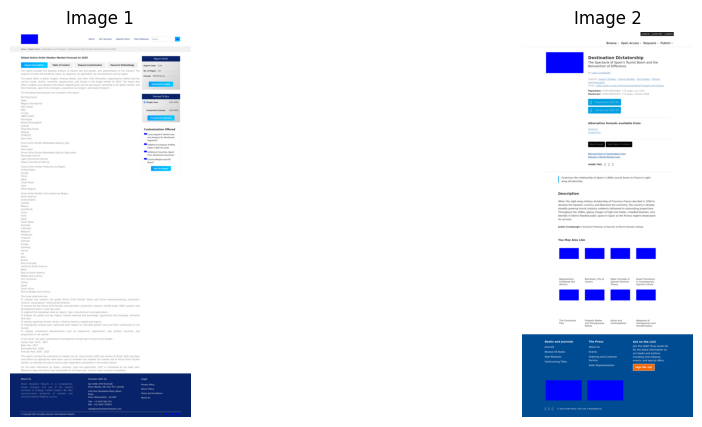

('testset_manual_filtered/12481.png', 'testset_manual_filtered/3011.png', 0.9369124174118042)


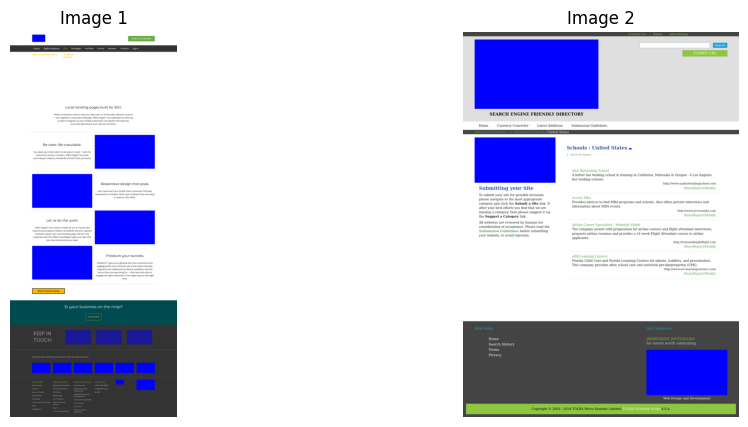

('testset_manual_filtered/12144.png', 'testset_manual_filtered/11384.png', 0.9367094039916992)


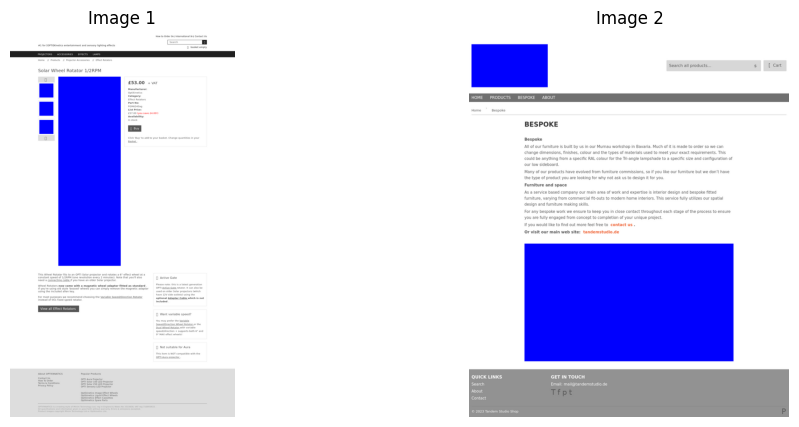

('testset_manual_filtered/3714.png', 'testset_manual_filtered/15097.png', 0.9366724491119385)


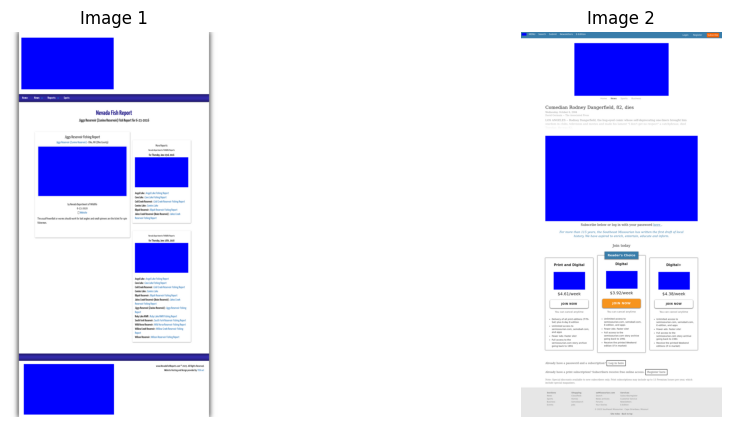

In [5]:
for pair in similarities[50 : 100]:
    print(pair)
    show_images_side_by_side(pair[0], pair[1])